#### Check the performance  of the route predictor sytems for an online delivery service company using statistical analysis, performing the EDA on company's data for valuable insights. 
<br>
In this case study we'll perform the following steps to fulfill our objective: <br>
- Clean, sanitize and manipulate data to get useful features out of raw fields, <br>
- Make sense out of the raw data (EDA), <br>
- Check if **OSRM** (Open Source Routing Engine : *computes the shortest path between points in a given map; (Includes usual traffic, distance through major and minor roads) (Cumulative)*) **distance and time**  share the same relationship as  **actual time and distance** or not, <br>
- Outlier identification and handling from the numerical fields,<br>
- **One-hot encoding** of categorical variables,<br>
- **Normalize/ Standardize** the numerical features using MinMaxScaler or StandardScaler. 
<br>

Apart from all the above, we'll also try to capture insights helpfull for business and make some recommedation to company.

<br>
Before that we'll import some libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

###### Column profiling for given data / Metadata

- **data** - tells whether the data is testing or training data
- **trip_creation_time** – Timestamp of trip creation
- **route_schedule_uuid** – Unique Id for a particular route schedule
- **route_type** – Transportation type
- **FTL – Full Truck Load**: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
- **Carting**: Handling system consisting of small vehicles (carts)
- **trip_uuid** - Unique ID given to a particular trip (A trip may include different source and destination centers)
- **source_center** - Source ID of trip origin
- **source_name** - Source Name of trip origin
- **destination_center** – Destination ID
- **destination_name** – Destination Name
- **od_start_time** – Trip start time
- **od_end_time** – Trip end time
- **start_scan_to_end_scan** – Time taken to deliver from source to destination
- **is_cutoff** – Unknown field
- **cutoff_factor** – Unknown field
- **cutoff_timestamp** – Unknown field
- **actual_distance_to_destination** – Distance in Kms between source and destination warehouse
- **actual_time** – Actual time taken to complete the delivery (Cumulative)
- **osrm_time** – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- **osrm_distance** – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
factor – Unknown field
- **segment_actual_time** – This is a segment time. Time taken by the subset of the package delivery
- **segment_osrm_time** – This is the OSRM segment time. Time taken by the subset of the package delivery
- **segment_osrm_distance** – This is the OSRM distance. Distance covered by subset of the package delivery
- **segment_factor** – Unknown field


In [2]:
# changing the times in dataset to datetime  form float data type
def to_datetime_dtype(col):
    df[col] = pd.to_datetime(df[col])

# distplot for numerical variables
def dist_plot(col):
    plt.figure(figsize = (4,3))
    sns.distplot(df[col])
    plt.title(col)

## Since delivery details of one package are divided into several rows, we would combine these rows i.e. merge by aggregating the numerical fields. <br>

We'll read our data first using pandas.

In [3]:
df1 = pd.read_csv('./Online_delivery_service_company.csv')
df = df1.copy()

Information about the data. This will check the presence of null values, count of columns and data type of columns.

In [4]:
# General information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

So, there are 24 columns present in the dataset. And count of columns with datatype 'object', 'float64', 'bool', 'int64' are 12, 10, 1, and 1 respectively.

In [5]:
print('Shape of data: ',df.shape)

Shape of data:  (144867, 24)


There are certain variables present in the data that should be of 'datetime' dtype instead of 'object',
hence we'll first convert them to appropriate dtype.

In [6]:
columns = ['trip_creation_time','cutoff_timestamp','od_start_time','od_end_time']
for i in columns:
    to_datetime_dtype(i)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

Percentage (%) of null values present in the data.

In [8]:
# missing values detection
df.isnull().sum()*100/len(df)

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

Only 0.20% and 0.18% values missing from the columns 'source_name' and 'destination_center' respectively. <br>
Thus we'll drop  the rows with those missing values. <br> 
Next, we'll drop the rows with columns ('source_name', 'destination_name') having null values.

In [9]:
df.dropna(subset = ['source_name','destination_name'], inplace = True)

Checking the statistical summary of the given data, although it won't reliable because there are duplicate products present in the data.

In [10]:
# statistical summary
df.describe().T

count        mean          std         min  \
start_scan_to_end_scan          144316.0  963.697698  1038.082976   20.000000   
cutoff_factor                   144316.0  233.561345   345.245823    9.000000   
actual_distance_to_destination  144316.0  234.708498   345.480571    9.000045   
actual_time                     144316.0  417.996237   598.940065    9.000000   
osrm_time                       144316.0  214.437055   308.448543    6.000000   
osrm_distance                   144316.0  285.549785   421.717826    9.008200   
factor                          144316.0    2.120178     1.717065    0.144000   
segment_actual_time             144316.0   36.175379    53.524298 -244.000000   
segment_osrm_time               144316.0   18.495697    14.774008    0.000000   
segment_osrm_distance           144316.0   22.818993    17.866367    0.000000   
segment_factor                  144316.0    2.218707     4.854804  -23.444444   

                                       25%         50%          75%  \
start_scan_to_end_scan          161.000000  451.000000  1645.000000   
cutoff_factor                    22.000000   66.000000   286.000000   
actual_distance_to_destination   23.352027   66.135322   286.919294   
actual_time                      51.000000  132.000000   516.000000   
osrm_time                        27.000000   64.000000   259.000000   
osrm_distance                    29.896250   78.624400   346.305400   
factor                            1.604545    1.857143     2.212280   
segment_actual_time              20.000000   28.000000    40.000000   
segment_osrm_time                11.000000   17.000000    22.000000   
segment_osrm_distance            12.053975   23.508300    27.813325   
segment_factor                    1.347826    1.684211     2.250000   

                                        max  
start_scan_to_end_scan          7898.000000  
cutoff_factor                   1927.000000  
actual_distance_to_destination  1927.447705  
actual_time                     4532.000000  
osrm_time                       1686.000000  
osrm_distance                   2326.199100  
factor                            77.387097  
segment_actual_time             3051.000000  
segment_osrm_time               1611.000000  
segment_osrm_distance           2191.403700  
segment_factor                   574.250000

###### Condensing / Merging the dataset so that  there is one row for each product.

We'll next condense or merge our data so that our data have one row dedicated for each product.  <br> In order to do so, we'll first use 'group by' based on the columns : 'trip_uuid', 'source_center', and 'destination_center', along with applying appropritae aggregate functions. Then we'll again use 'group by' but this time only on column: 'trip_uuid'. 

In [11]:
df = df.groupby(["trip_uuid",'source_center','destination_center'], sort = False).agg(
    trip_creation_time_first = ('trip_creation_time','first'),
    segment_actual_time_sum = ('segment_actual_time','sum'),
    actual_time_last = ('actual_time','last'),
    segment_osrm_time_sum = ('segment_osrm_time','sum'),
    osrm_time_last = ('osrm_time','last'),
    od_start_time_first = ('od_start_time','first'),
    od_end_time_last = ('od_end_time','last'),
    segment_osrm_distance_sum = ("segment_osrm_distance",'sum'),
    osrm_distance_last = ('osrm_distance','last'),
    actual_distance_to_destination_last = ('actual_distance_to_destination','last'),
    route_schedule_uuid_first = ('route_schedule_uuid','first'),
    route_type_first = ('route_type','first'),
    source_name_first = ("source_name",'first'),
    destination_name_last = ('destination_name','last'),
    start_scan_to_end_scan_last = ('start_scan_to_end_scan','last')
).reset_index()
df.head()


trip_uuid source_center destination_center  \
0  trip-153741093647649320  IND388121AAA       IND388620AAB   
1  trip-153741093647649320  IND388620AAB       IND388320AAA   
2  trip-153768492602129387  IND421302AAG       IND411033AAA   
3  trip-153693976643699843  IND400011AAA       IND400072AAD   
4  trip-153687145942424248  IND562132AAA       IND560099AAB   

    trip_creation_time_first  segment_actual_time_sum  actual_time_last  \
0 2018-09-20 02:35:36.476840                     67.0              68.0   
1 2018-09-20 02:35:36.476840                    100.0             102.0   
2 2018-09-23 06:42:06.021680                    180.0             183.0   
3 2018-09-14 15:42:46.437249                     60.0              60.0   
4 2018-09-13 20:44:19.424489                     67.0              67.0   

   segment_osrm_time_sum  osrm_time_last        od_start_time_first  \
0                   44.0            44.0 2018-09-20 03:21:32.418600   
1                   44.0            45.0 2018-09-20 04:47:45.236797   
2                  106.0            95.0 2018-09-23 06:42:06.021680   
3                   16.0            16.0 2018-09-14 15:42:46.437249   
4                   56.0            53.0 2018-09-13 20:44:19.424489   

            od_end_time_last  segment_osrm_distance_sum  osrm_distance_last  \
0 2018-09-20 04:47:45.236797                    49.4772             54.2181   
1 2018-09-20 06:36:55.627764                    53.2334             53.2334   
2 2018-09-23 11:44:28.365845                   130.4089            129.3519   
3 2018-09-14 17:31:45.368791                    18.7941             18.7941   
4 2018-09-13 23:59:56.061158                    53.9310             52.1256   

   actual_distance_to_destination_last  \
0                            39.386040   
1                            43.595802   
2                           100.708423   
3                            16.431273   
4                            39.806036   

                           route_schedule_uuid_first route_type_first  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...          Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...          Carting   
2  thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...              FTL   
3  thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...          Carting   
4  thanos::sroute:76951383-1608-44e4-a284-46d92e8...              FTL   

                   source_name_first              destination_name_last  \
0         Anand_VUNagar_DC (Gujarat)      Khambhat_MotvdDPP_D (Gujarat)   
1      Khambhat_MotvdDPP_D (Gujarat)         Anand_Vaghasi_IP (Gujarat)   
2  Bhiwandi_Mankoli_HB (Maharashtra)      Pune_Tathawde_H (Maharashtra)   
3        LowerParel_CP (Maharashtra)   Mumbai_Chndivli_PC (Maharashtra)   
4   Bangalore_Nelmngla_H (Karnataka)  Bengaluru_Bomsndra_HB (Karnataka)   

   start_scan_to_end_scan_last  
0                         86.0  
1                        109.0  
2                        302.0  
3                        108.0  
4                        195.0

In [12]:
print("The shape of the new df: ",df.shape)

The shape of the new df:  (26222, 18)


As we can see the shape of the data provided has been reduced to 26222 rows from 144866 rows. <br>
Again grouping the data by 'trip_uuid' variable alone.

In [13]:
new_df = df.groupby(['trip_uuid'], sort = False).agg(
    source_center = ('source_center','first'),
    destination_center = ('destination_center','last'),
    trip_creation_time_first = ('trip_creation_time_first','first'),
    segment_actual_time_sum = ('segment_actual_time_sum','sum'),
    actual_time_sum = ('actual_time_last','sum'),
    segment_osrm_time_sum = ('segment_osrm_time_sum','sum'),
    osrm_time_sum = ('osrm_time_last','sum'),
    od_start_time_first = ('od_start_time_first','first'),
    od_end_time_last = ('od_end_time_last','last'),
    segment_osrm_distance_sum = ("segment_osrm_distance_sum",'sum'),
    osrm_distance_sum = ('osrm_distance_last','sum'),
    actual_distance_to_destination_sum = ('actual_distance_to_destination_last','sum'),
    
    route_schedule_uuid_first = ('route_schedule_uuid_first','first'),
    route_type_first = ('route_type_first','first'),
    route_type_last = ('route_type_first','last'),
    source_name_first = ("source_name_first",'first'),
#     source_name_last = ('source_name_first','last'),
    destination_name_last = ('destination_name_last','last'),
    start_scan_to_end_scan_sum = ('start_scan_to_end_scan_last','sum')
).reset_index()
new_df.head()

trip_uuid source_center destination_center  \
0  trip-153741093647649320  IND388121AAA       IND388320AAA   
1  trip-153768492602129387  IND421302AAG       IND411033AAA   
2  trip-153693976643699843  IND400011AAA       IND400072AAD   
3  trip-153687145942424248  IND562132AAA       IND683511AAA   
4  trip-153825970514894360  IND141003AAB       IND000000ACA   

    trip_creation_time_first  segment_actual_time_sum  actual_time_sum  \
0 2018-09-20 02:35:36.476840                    167.0            170.0   
1 2018-09-23 06:42:06.021680                    180.0            183.0   
2 2018-09-14 15:42:46.437249                     60.0             60.0   
3 2018-09-13 20:44:19.424489                    799.0            805.0   
4 2018-09-29 22:21:45.149226                    151.0            152.0   

   segment_osrm_time_sum  osrm_time_sum        od_start_time_first  \
0                   88.0           89.0 2018-09-20 03:21:32.418600   
1                  106.0           95.0 2018-09-23 06:42:06.021680   
2                   16.0           16.0 2018-09-14 15:42:46.437249   
3                  502.0          486.0 2018-09-13 20:44:19.424489   
4                  137.0          123.0 2018-09-30 02:22:04.138164   

            od_end_time_last  segment_osrm_distance_sum  osrm_distance_sum  \
0 2018-09-20 06:36:55.627764                   102.7106           107.4515   
1 2018-09-23 11:44:28.365845                   130.4089           129.3519   
2 2018-09-14 17:31:45.368791                    18.7941            18.7941   
3 2018-09-14 13:55:58.765334                   560.5092           524.7155   
4 2018-09-30 06:44:42.320422                   115.7501           123.7654   

   actual_distance_to_destination_sum  \
0                           82.981842   
1                          100.708423   
2                           16.431273   
3                          371.458435   
4                           95.488499   

                           route_schedule_uuid_first route_type_first  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...          Carting   
1  thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...              FTL   
2  thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...          Carting   
3  thanos::sroute:76951383-1608-44e4-a284-46d92e8...              FTL   
4  thanos::sroute:0904e75c-b3ac-4278-96cf-802835a...              FTL   

  route_type_last                  source_name_first  \
0         Carting         Anand_VUNagar_DC (Gujarat)   
1             FTL  Bhiwandi_Mankoli_HB (Maharashtra)   
2         Carting        LowerParel_CP (Maharashtra)   
3             FTL   Bangalore_Nelmngla_H (Karnataka)   
4             FTL      Ludhiana_GillChwk_DC (Punjab)   

              destination_name_last  start_scan_to_end_scan_sum  
0        Anand_Vaghasi_IP (Gujarat)                       195.0  
1     Pune_Tathawde_H (Maharashtra)                       302.0  
2  Mumbai_Chndivli_PC (Maharashtra)                       108.0  
3          Aluva_Peedika_H (Kerala)                      1031.0  
4     Ludhiana_MilrGanj_HB (Punjab)                       261.0

Creating a new column, 'Factor' that will quantify the comparison of the actual time and time predicted by the model in  successfully completing the delivery.

In [14]:
new_df['factor'] = new_df['actual_time_sum']/new_df['osrm_time_sum']

In [15]:
# shape of the new_df
print("shape of the new_df:", new_df.shape)

shape of the new_df: (14787, 20)


Post aggregation of the dataset, we noticed that:
<br>
The shape has reduced from 26,222 to 14,787 rows only. This is drop of approximately 43.6%.<br>
Now, in our new dataframe ('new_df') we have one row dedicated for one delievery package only. Now we can proceed with our analyis.


######  Statistical Analysis of new_df

In [16]:
new_df.describe().T

count        mean         std  \
segment_actual_time_sum             14787.0  353.059174  556.365911   
actual_time_sum                     14787.0  356.306012  561.517936   
segment_osrm_time_sum               14787.0  180.511598  314.679279   
osrm_time_sum                       14787.0  160.990938  271.459495   
segment_osrm_distance_sum           14787.0  222.705466  416.846279   
osrm_distance_sum                   14787.0  203.887411  370.565564   
actual_distance_to_destination_sum  14787.0  164.090196  305.502982   
start_scan_to_end_scan_sum          14787.0  529.399405  658.201130   
factor                              14787.0    2.664135    2.362598   

                                          min         25%         50%  \
segment_actual_time_sum              9.000000   66.000000  147.000000   
actual_time_sum                      9.000000   67.000000  148.000000   
segment_osrm_time_sum                6.000000   30.000000   65.000000   
osrm_time_sum                        6.000000   29.000000   60.000000   
segment_osrm_distance_sum            9.072900   32.578850   69.784200   
osrm_distance_sum                    9.072900   30.756900   65.302800   
actual_distance_to_destination_sum   9.002461   22.777099   48.287894   
start_scan_to_end_scan_sum          23.000000  149.000000  279.000000   
factor                               0.485714    1.750000    2.101227   

                                           75%          max  
segment_actual_time_sum             364.000000  6230.000000  
actual_time_sum                     367.000000  6265.000000  
segment_osrm_time_sum               184.000000  2564.000000  
osrm_time_sum                       168.000000  2032.000000  
segment_osrm_distance_sum           216.560600  3523.632400  
osrm_distance_sum                   206.644200  2840.081000  
actual_distance_to_destination_sum  163.591258  2186.531787  
start_scan_to_end_scan_sum          632.000000  7898.000000  
factor                                2.767315    77.387097

This table shows the ranges of the **actual time and distance**  & **osrm time and distance**. <br>

On looking at the table, and looking at the mean of **actual time and distance** & **osrm time and distance**, it may look like they have the same relationship. 
<br>
But later we'll find out how different they both are. And how this statistical data, hide the *inefficiency* of the OSRM system of the company.

In [17]:
new_df.describe(include = 'object').T

count unique  \
trip_uuid                  14787  14787   
source_center              14787    865   
destination_center         14787    951   
route_schedule_uuid_first  14787   1497   
route_type_first           14787      2   
route_type_last            14787      2   
source_name_first          14787    865   
destination_name_last      14787    951   

                                                                         top  \
trip_uuid                                            trip-153741093647649320   
source_center                                                   IND000000ACB   
destination_center                                              IND000000ACB   
route_schedule_uuid_first  thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...   
route_type_first                                                     Carting   
route_type_last                                                      Carting   
source_name_first                              Gurgaon_Bilaspur_HB (Haryana)   
destination_name_last                          Gurgaon_Bilaspur_HB (Haryana)   

                           freq  
trip_uuid                     1  
source_center               937  
destination_center          813  
route_schedule_uuid_first    53  
route_type_first           8906  
route_type_last            8906  
source_name_first           937  
destination_name_last       813

#### Extracting information from the source location and destination location

In [18]:
#### EXTRACTING DATA FROM DESTINATION NAME #######
print("DESTINATION location info:")
## FOR CITY ##
new_df['dest_city'] = new_df['destination_name_last'].str.extract(r'^([A-Z]{1}[a-z]+)')
    # unique values in destination cities
print("Total number of unique destination cities : ", new_df['dest_city'].nunique())
    # null values in terms of destination city
print('% of null values in destination city ("dest_city"):',
      new_df['dest_city'].isnull().sum() * 100 /len(new_df))

## FOR PLACE ##
new_df['dest_place'] = new_df['destination_name_last'].str.extract(r'((?<=_).*?(?=_))')
    # null values in terms of destination place
print('% of null values in destination place ("dest_place"):',
      new_df['dest_place'].isnull().sum() * 100 /len(new_df))

## FOR STATE ##
new_df['dest_State'] = new_df['destination_name_last'].str.extract(r'((?<=\().*?(?=\)))')
# unique values in destination States
print("Total number of unique destination states : ", new_df['dest_State'].nunique())
    # null values in terms of destination state
print('% of null values in destination state or UTs ("dest_State"):',
      new_df['dest_State'].isnull().sum() * 100 /len(new_df))


print("-"*75)
print("SOURCE Location info: ")

#### EXTRACTING DATA FROM SOURCE NAME #######

## FOR CITY ##
new_df['source_city'] = new_df['source_name_first'].str.extract(r'^([A-Z]{1}[a-z]+)')
    # unique values in source cities
print("Total number of unique source cities : ", new_df['source_city'].nunique())
    # null values in terms of source city
print('% of null values in source city ("source_city"):',
      new_df['source_city'].isnull().sum() * 100 /len(new_df))

## FOR PLACE ##
new_df['source_place'] = new_df['source_name_first'].str.extract(r'((?<=_).*?(?=_))')
    # null values in terms of source place
print('% of null values in source place ("source_place"):',
      new_df['source_place'].isnull().sum() * 100 /len(new_df))

## FOR STATE ##
new_df['source_State'] = new_df['source_name_first'].str.extract(r'((?<=\().*?(?=\)))')
# unique values in source states
print("Total number of unique source states or UTs : ", new_df['source_State'].nunique())
    # null values in terms of source state
print('% of null values in source state ("source_State"):',
      new_df['source_State'].isnull().sum() * 100 /len(new_df))

DESTINATION location info:
Total number of unique destination cities :  746
% of null values in destination city ("dest_city"): 6.64096841820518
% of null values in destination place ("dest_place"): 11.577737201595996
Total number of unique destination states :  32
% of null values in destination state or UTs ("dest_State"): 0.0
---------------------------------------------------------------------------
SOURCE Location info: 
Total number of unique source cities :  654
% of null values in source city ("source_city"): 5.335767904240211
% of null values in source place ("source_place"): 12.240481504023805
Total number of unique source states or UTs :  29
% of null values in source state ("source_State"): 0.0


As shown above the null values in the columns 'dest_city' and 'dest_place' & 'source_city' and 'source_place' are more than 5% so, we can't remove them. <br> 
We'll keep them as it is and replace those values with 'unknown'. <br>
The results have number of states greater that 28 because it is counting Union Territories (UTs) in the states columns.

In [19]:
columns_places = ['source_place','source_city','dest_city','dest_place']
for i in columns_places:
    new_df[i].fillna('unknown', inplace = True)

In [20]:
## Extraction year, month, day, hour, minute from trip creation time

new_df['date_trip_creation'] = new_df['trip_creation_time_first'].dt.date
new_df['year_trip_creation'] = new_df['trip_creation_time_first'].dt.year
new_df['month_trip_creation'] = new_df['trip_creation_time_first'].dt.month
new_df['day_trip_creation'] = new_df['trip_creation_time_first'].dt.day
new_df['time_trip_creation'] = new_df['trip_creation_time_first'].dt.time
new_df['hour_trip_creation'] = new_df['trip_creation_time_first'].dt.hour
new_df['minute_trip_creation'] = new_df['trip_creation_time_first'].dt.minute
new_df[['date_trip_creation','month_trip_creation','day_trip_creation','time_trip_creation']]

date_trip_creation  month_trip_creation  day_trip_creation  \
0             2018-09-20                    9                 20   
1             2018-09-23                    9                 23   
2             2018-09-14                    9                 14   
3             2018-09-13                    9                 13   
4             2018-09-29                    9                 29   
...                  ...                  ...                ...   
14782         2018-09-26                    9                 26   
14783         2018-09-14                    9                 14   
14784         2018-09-22                    9                 22   
14785         2018-09-17                    9                 17   
14786         2018-09-20                    9                 20   

      time_trip_creation  
0        02:35:36.476840  
1        06:42:06.021680  
2        15:42:46.437249  
3        20:44:19.424489  
4        22:21:45.149226  
...                  ...  
14782    19:50:29.657378  
14783    18:45:34.164734  
14784    11:30:41.399439  
14785    11:35:28.838714  
14786    16:24:28.436231  

[14787 rows x 4 columns]

Unique months and year present in the dataset.

In [21]:
print('Months: ',new_df['month_trip_creation'].unique(),'\n','Year: ',new_df['year_trip_creation'].unique())

Months:  [ 9 10] 
 Year:  [2018]


The data that we are provided with consist of only deliveris conducted in the year 2018 and in the month of 9 (september) and 10 (october).
we have successfully extracted the data, year, day, time, month etc from the 'trip_creation_time'.<br>
<br>
Next, we'll perform EDA on the new dataset new_df.

###### DISTRIBUTION PLOTS FOR CONTINUOUS VARIABLES

In [22]:
new_df.columns

Index(['trip_uuid', 'source_center', 'destination_center',
       'trip_creation_time_first', 'segment_actual_time_sum',
       'actual_time_sum', 'segment_osrm_time_sum', 'osrm_time_sum',
       'od_start_time_first', 'od_end_time_last', 'segment_osrm_distance_sum',
       'osrm_distance_sum', 'actual_distance_to_destination_sum',
       'route_schedule_uuid_first', 'route_type_first', 'route_type_last',
       'source_name_first', 'destination_name_last',
       'start_scan_to_end_scan_sum', 'factor', 'dest_city', 'dest_place',
       'dest_State', 'source_city', 'source_place', 'source_State',
       'date_trip_creation', 'year_trip_creation', 'month_trip_creation',
       'day_trip_creation', 'time_trip_creation', 'hour_trip_creation',
       'minute_trip_creation'],
      dtype='object')

<AxesSubplot:xlabel='start_scan_to_end_scan_sum', ylabel='Density'>

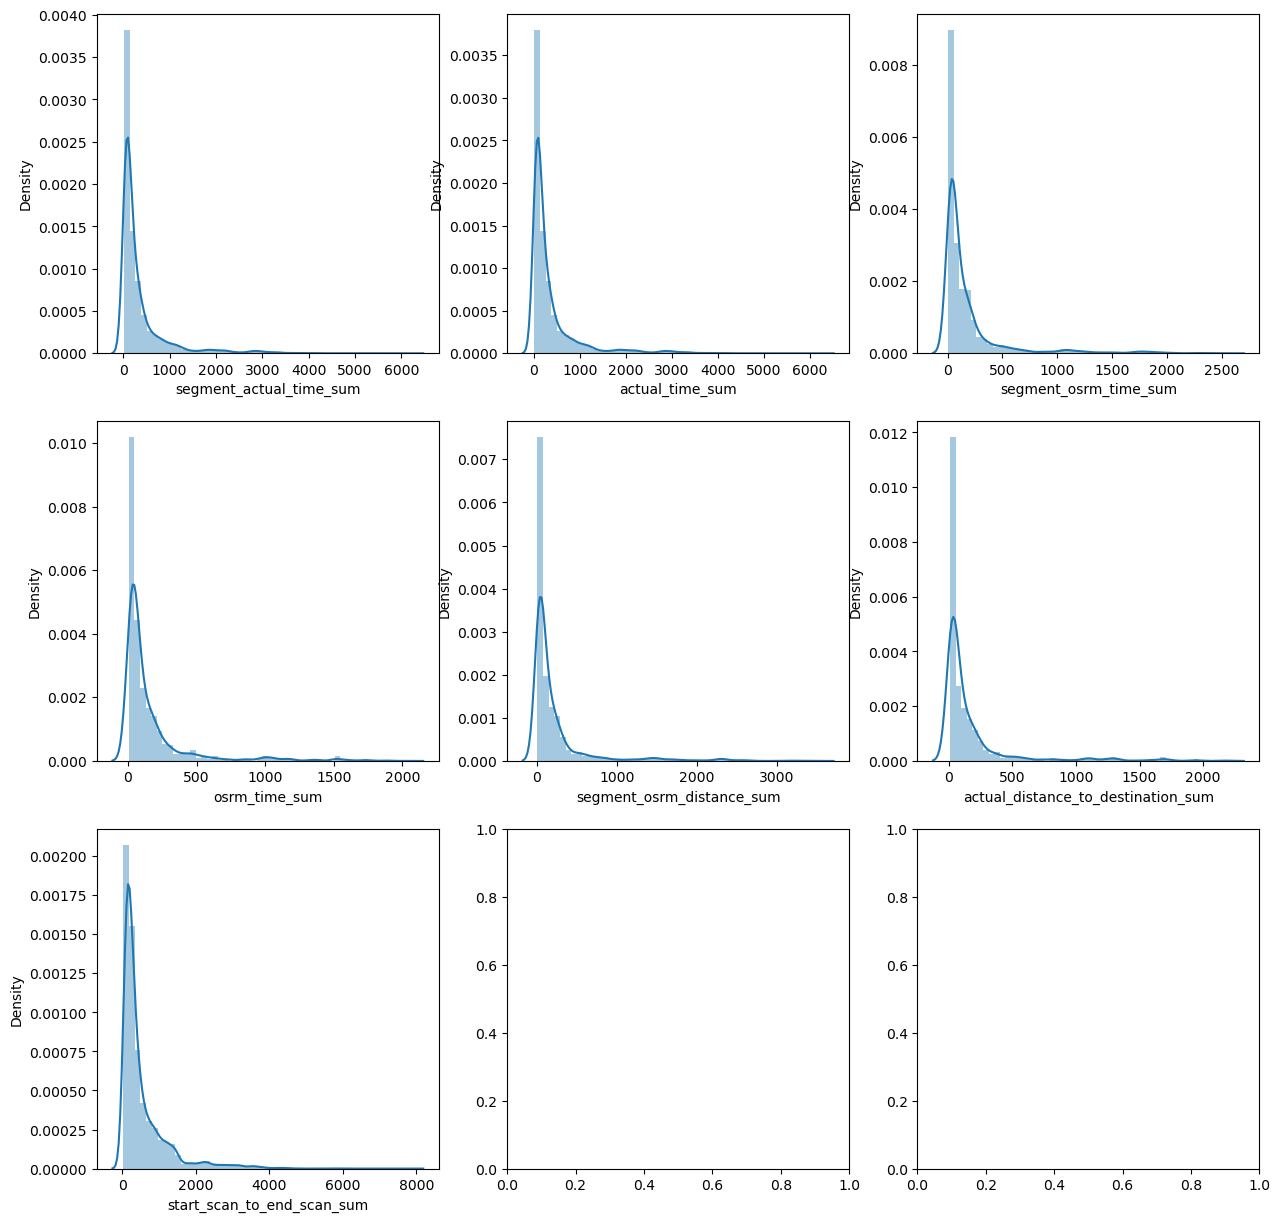

In [23]:
fig, ax = plt.subplots(nrows = 3,ncols = 3, figsize = (15,15))
sns.distplot(new_df['segment_actual_time_sum'], ax = ax[0,0])
sns.distplot(new_df['actual_time_sum'],ax = ax[0,1])
sns.distplot(new_df['segment_osrm_time_sum'],ax = ax[0,2])
sns.distplot(new_df['osrm_time_sum'],ax = ax[1,0])
sns.distplot(new_df['segment_osrm_distance_sum'],ax = ax[1,1])
sns.distplot(new_df['actual_distance_to_destination_sum'],ax = ax[1,2])
sns.distplot(new_df['start_scan_to_end_scan_sum'],ax = ax[2,0])



One can observe clearly that all the plots for continuous variables are positively or rightly skewed. Hence, while conducting the hypothesis test we need to transform the data to make it normal. The same has been done when we'll conduct hypothesis testing.

In [24]:
new_df.columns

Index(['trip_uuid', 'source_center', 'destination_center',
       'trip_creation_time_first', 'segment_actual_time_sum',
       'actual_time_sum', 'segment_osrm_time_sum', 'osrm_time_sum',
       'od_start_time_first', 'od_end_time_last', 'segment_osrm_distance_sum',
       'osrm_distance_sum', 'actual_distance_to_destination_sum',
       'route_schedule_uuid_first', 'route_type_first', 'route_type_last',
       'source_name_first', 'destination_name_last',
       'start_scan_to_end_scan_sum', 'factor', 'dest_city', 'dest_place',
       'dest_State', 'source_city', 'source_place', 'source_State',
       'date_trip_creation', 'year_trip_creation', 'month_trip_creation',
       'day_trip_creation', 'time_trip_creation', 'hour_trip_creation',
       'minute_trip_creation'],
      dtype='object')

<AxesSubplot:xlabel='year_trip_creation', ylabel='factor'>

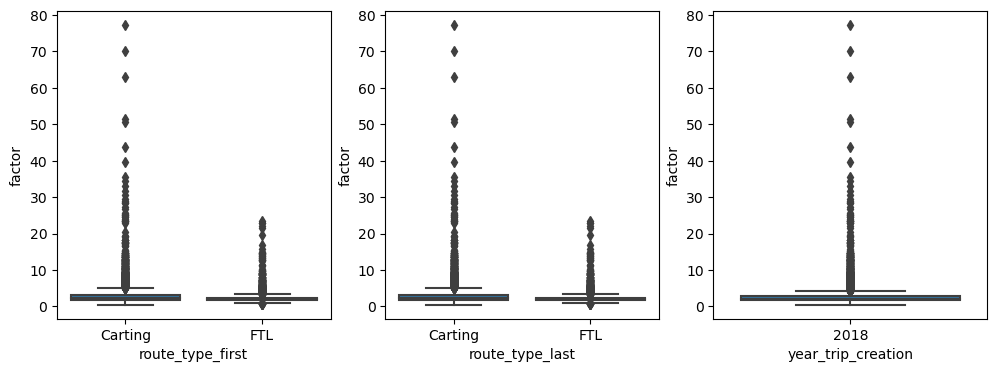

In [25]:
fig, ax = plt.subplots(nrows = 1,ncols = 3, figsize = (12,4))
sns.boxplot(data = new_df, y = 'factor', x = 'route_type_first', ax = ax[0])
sns.boxplot(data = new_df, y = 'factor', x = 'route_type_last', ax = ax[1])
sns.boxplot(data = new_df, y = 'factor', x = 'year_trip_creation', ax = ax[2])

Here we can observe there are many outliers. So, we need to fix this.  we'll add one another columns to our new_df which we'll use later in our hypothesis testing.

In [26]:
new_df['od_time_difference'] = pd.to_timedelta(new_df['od_end_time_last'] - new_df['od_start_time_first'])
new_df['od_time_difference'] = np.round(new_df['od_time_difference'].dt.seconds/60,3) # in minutes

#### OUTLIER DETECTION AND TREATMENT

###### Detection

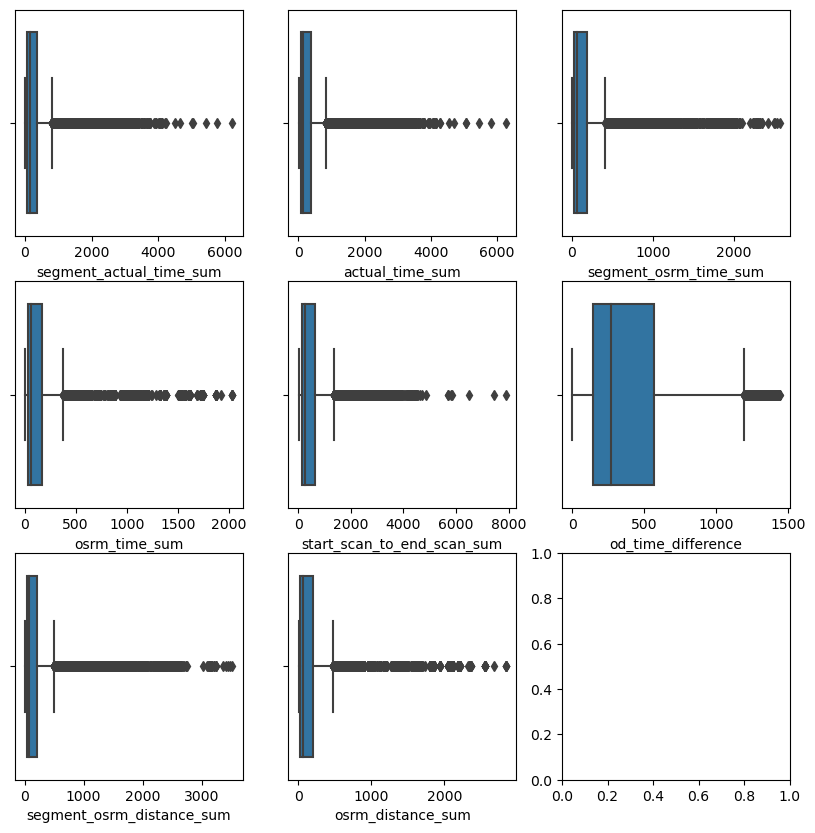

In [27]:
fig,ax = plt.subplots(nrows = 3, ncols = 3, figsize = (10,10))

sns.boxplot(new_df['segment_actual_time_sum'],ax = ax[0,0])
sns.boxplot(new_df['actual_time_sum'],ax = ax[0,1])
sns.boxplot(new_df['segment_osrm_time_sum'],ax = ax[0,2])
sns.boxplot(new_df['osrm_time_sum'],ax = ax[1,0])
sns.boxplot(new_df["start_scan_to_end_scan_sum"],ax = ax[1,1])
sns.boxplot(new_df['od_time_difference'],ax = ax[1,2])
sns.boxplot(new_df['segment_osrm_distance_sum'],ax = ax[2,0])
sns.boxplot(new_df['osrm_distance_sum'],ax = ax[2,1])

plt.show()

As we can observe there are many outliers present in each numerical variables column.
So, we'll remove them using inter quartile range approach (iqr).<br>
However, it should be noted that removing the outliers would bring some changes in the data because 'segment' time and distance has also been recorded in the data. <br>
so we can run the hypothesis test on the both the kind of data i.e. with outlier removal and without outliers removal to see if the conclusion drawn from the hypothesis test changes.

###### Outlier removal

#### What to do with these outliers: remove / not remove?
We'll not use the data with removed outliers as it will reduce its reliability, because in delivery business there are always some distance that are very close and some are very far. These outliers aren't by mistake, but the data is like this. <br>
Still for the sake of handline outliers, we'll remove them in a new dataset new_df2 which is copy or our dataset new_df.

In [28]:
new_df2 = new_df.copy()

<AxesSubplot:xlabel='od_time_difference'>

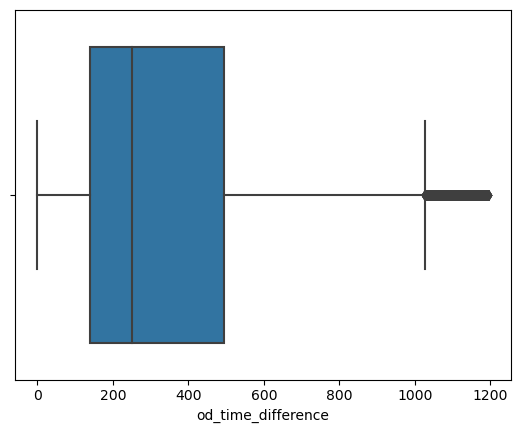

In [29]:
# column : 'od_time_difference'
q1 = new_df2['od_time_difference'].quantile(0.25)
q3 = new_df2['od_time_difference'].quantile(0.75)
iqr = q3-q1
new_df2 = new_df2[(new_df['od_time_difference']<= q3 + 1.5*iqr)
                  & (new_df['od_time_difference']>=q1 - (1.5*iqr))]
sns.boxplot(new_df2['od_time_difference'])


C:\Users\A Singh\AppData\Local\Temp\ipykernel_17108\3365176014.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df2 = new_df2[(new_df['actual_time_sum']<= q3 + 1.5*iqr)


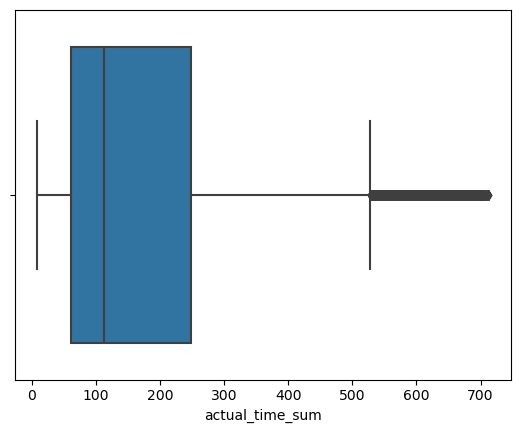

In [30]:
# column : 'actual_time_sum'
q1 = new_df2['actual_time_sum'].quantile(0.25)
q3 = new_df2['actual_time_sum'].quantile(0.75)
iqr = q3-q1
new_df2 = new_df2[(new_df['actual_time_sum']<= q3 + 1.5*iqr)
                  & (new_df['actual_time_sum']>=q1 - (1.5*iqr))]
sns.boxplot(new_df2['actual_time_sum'])
plt.show()

C:\Users\A Singh\AppData\Local\Temp\ipykernel_17108\1626341727.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df2= new_df2[(new_df["start_scan_to_end_scan_sum"]<= q3 + 1.5*iqr)


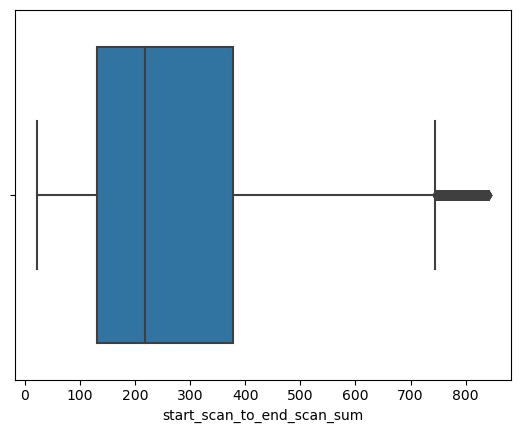

In [31]:
# column : "start_scan_to_end_scan_sum"

q1 = new_df2["start_scan_to_end_scan_sum"].quantile(0.25)
q3 = new_df2["start_scan_to_end_scan_sum"].quantile(0.75)
iqr = q3-q1
new_df2= new_df2[(new_df["start_scan_to_end_scan_sum"]<= q3 + 1.5*iqr)
                 & (new_df["start_scan_to_end_scan_sum"]>=q1 - (1.5*iqr))]
sns.boxplot(new_df2["start_scan_to_end_scan_sum"])
plt.show()


C:\Users\A Singh\AppData\Local\Temp\ipykernel_17108\2029160987.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df2 = new_df2[(new_df['osrm_time_sum']<= q3 + 1.5*iqr)


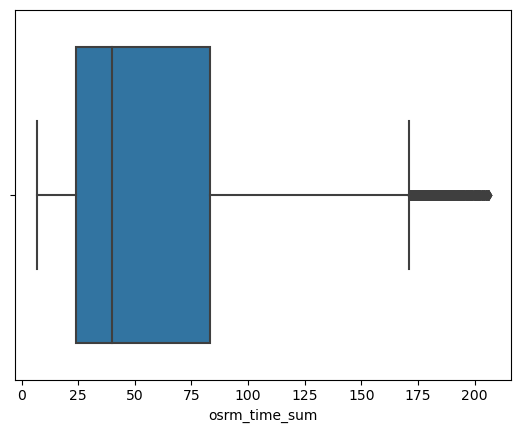

In [32]:
# column : 'osrm_time_sum'
q1 = new_df2['osrm_time_sum'].quantile(0.25)
q3 = new_df2['osrm_time_sum'].quantile(0.75)
iqr = q3-q1
new_df2 = new_df2[(new_df['osrm_time_sum']<= q3 + 1.5*iqr)
                  & (new_df['osrm_time_sum']>=q1 - (1.5*iqr))]
sns.boxplot(new_df2['osrm_time_sum'])
plt.show()

C:\Users\A Singh\AppData\Local\Temp\ipykernel_17108\4077373668.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df2 = new_df2[(new_df['segment_actual_time_sum']<= q3 + 1.5*iqr)


<AxesSubplot:xlabel='segment_actual_time_sum'>

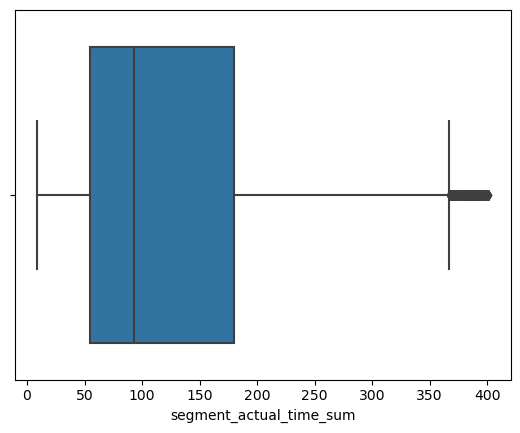

In [33]:
# column : 'segment_actual_time_sum'
q1 = new_df2['segment_actual_time_sum'].quantile(0.25)
q3 = new_df2['segment_actual_time_sum'].quantile(0.75)
iqr = q3-q1
new_df2 = new_df2[(new_df['segment_actual_time_sum']<= q3 + 1.5*iqr)
                  & (new_df['segment_actual_time_sum']>=q1 - (1.5*iqr))]
sns.boxplot(new_df2['segment_actual_time_sum'])


C:\Users\A Singh\AppData\Local\Temp\ipykernel_17108\324049062.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df2 = new_df2[(new_df['segment_osrm_distance_sum']<= q3 + 1.5*iqr)


<AxesSubplot:xlabel='segment_osrm_distance_sum'>

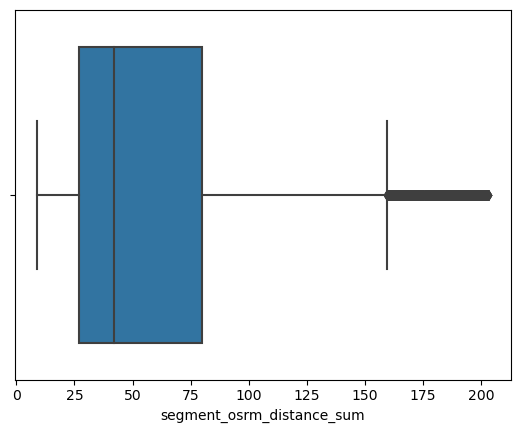

In [34]:
# column : 'segment_osrm_distance_sum'
q1 = new_df2['segment_osrm_distance_sum'].quantile(0.25)
q3 = new_df2['segment_osrm_distance_sum'].quantile(0.75)
iqr = q3-q1
new_df2 = new_df2[(new_df['segment_osrm_distance_sum']<= q3 + 1.5*iqr) 
                  & (new_df['segment_osrm_distance_sum']>=q1 - (1.5*iqr))]
sns.boxplot(new_df2['segment_osrm_distance_sum'])


C:\Users\A Singh\AppData\Local\Temp\ipykernel_17108\195774285.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df2 = new_df2[(new_df['osrm_distance_sum']<= q3 + 1.5*iqr)


<AxesSubplot:xlabel='osrm_distance_sum'>

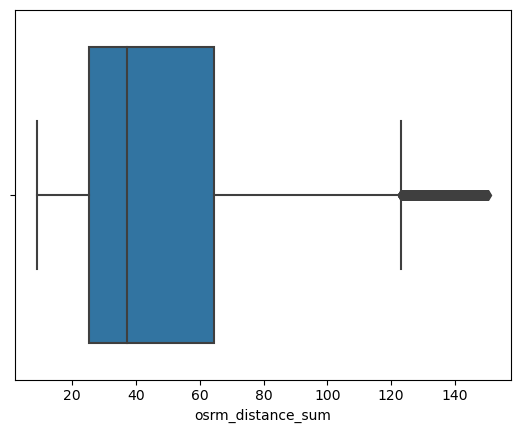

In [35]:
# column : 'osrm_distance_sum'
q1 = new_df2['osrm_distance_sum'].quantile(0.25)
q3 = new_df2['osrm_distance_sum'].quantile(0.75)
iqr = q3-q1
new_df2 = new_df2[(new_df['osrm_distance_sum']<= q3 + 1.5*iqr) 
                  & (new_df['osrm_distance_sum']>=q1 - (1.5*iqr))]
sns.boxplot(new_df2['osrm_distance_sum'])




C:\Users\A Singh\AppData\Local\Temp\ipykernel_17108\2627800058.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df2 = new_df2[(new_df['segment_osrm_time_sum']<= q3 + 1.5*iqr)


<AxesSubplot:xlabel='segment_osrm_time_sum'>

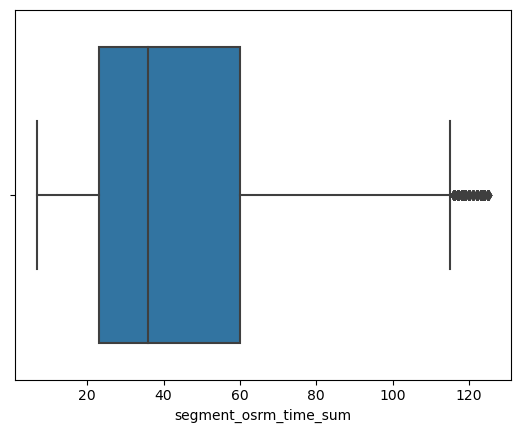

In [36]:
# column : 'segment_osrm_time_sum'
q1 = new_df2['segment_osrm_time_sum'].quantile(0.25)
q3 = new_df2['segment_osrm_time_sum'].quantile(0.75)
iqr = q3-q1
new_df2 = new_df2[(new_df['segment_osrm_time_sum']<= q3 + 1.5*iqr) 
                  & (new_df['segment_osrm_time_sum']>=q1 - (1.5*iqr))]
sns.boxplot(new_df2['segment_osrm_time_sum'])


After the removal of ouliers we can still see outliers on creating the boxplot of the data. Since the distplot showed right skewed nature, this implies some values are very distant from each other and they are considerable in number and hence causing such long right skewness. So, even after the removal of those extreme outliers, when we again plotted the data there still some values that were out of the iqr bound limits.

In [37]:
print("The shape of the dataset (new_df2) with outliers removed",new_df2.shape)

The shape of the dataset (new_df2) with outliers removed (9183, 34)


In [38]:
new_df2.describe().T

count         mean         std  \
segment_actual_time_sum             9183.0    98.797670   66.713236   
actual_time_sum                     9183.0    99.811282   67.121088   
segment_osrm_time_sum               9183.0    44.329631   27.714006   
osrm_time_sum                       9183.0    41.399543   25.615471   
segment_osrm_distance_sum           9183.0    48.798641   32.636418   
osrm_distance_sum                   9183.0    45.853282   31.244290   
actual_distance_to_destination_sum  9183.0    35.916681   25.562475   
start_scan_to_end_scan_sum          9183.0   203.724818  127.949952   
factor                              9183.0     2.644512    1.662021   
year_trip_creation                  9183.0  2018.000000    0.000000   
month_trip_creation                 9183.0     9.123816    0.329389   
day_trip_creation                   9183.0    18.313841    7.974294   
hour_trip_creation                  9183.0    11.940216    7.995821   
minute_trip_creation                9183.0    29.854514   17.360389   
od_time_difference                  9183.0   210.303577  138.073068   

                                            min          25%          50%  \
segment_actual_time_sum                9.000000    50.000000    78.000000   
actual_time_sum                        9.000000    51.000000    79.000000   
segment_osrm_time_sum                  7.000000    23.000000    36.000000   
osrm_time_sum                          7.000000    22.000000    34.000000   
segment_osrm_distance_sum              9.072900    25.667850    38.638800   
osrm_distance_sum                      9.072900    24.553850    36.169200   
actual_distance_to_destination_sum     9.002461    18.022148    27.993927   
start_scan_to_end_scan_sum            23.000000   113.000000   174.000000   
factor                                 0.485714     1.722222     2.196078   
year_trip_creation                  2018.000000  2018.000000  2018.000000   
month_trip_creation                    9.000000     9.000000     9.000000   
day_trip_creation                      1.000000    14.000000    19.000000   
hour_trip_creation                     0.000000     4.000000    13.000000   
minute_trip_creation                   0.000000    15.000000    30.000000   
od_time_difference                    23.450000   114.225000   176.917000   

                                            75%          max  
segment_actual_time_sum              130.000000   400.000000  
actual_time_sum                      132.000000   402.000000  
segment_osrm_time_sum                 60.000000   125.000000  
osrm_time_sum                         56.000000   131.000000  
segment_osrm_distance_sum             63.903700   171.505200  
osrm_distance_sum                     56.243000   150.101400  
actual_distance_to_destination_sum    42.864389   139.374589  
start_scan_to_end_scan_sum           259.000000   840.000000  
factor                                 2.972973    31.545455  
year_trip_creation                  2018.000000  2018.000000  
month_trip_creation                    9.000000    10.000000  
day_trip_creation                     25.000000    30.000000  
hour_trip_creation                    20.000000    23.000000  
minute_trip_creation                  45.000000    59.000000  
od_time_difference                   266.191500  1138.933000

In [39]:
new_df2.describe(include = "object").T

count unique  \
trip_uuid                  9183   9183   
source_center              9183    662   
destination_center         9183    757   
route_schedule_uuid_first  9183   1169   
route_type_first           9183      2   
route_type_last            9183      2   
source_name_first          9183    662   
destination_name_last      9183    757   
dest_city                  9183    573   
dest_place                 9183    539   
dest_State                 9183     30   
source_city                9183    470   
source_place               9183    454   
source_State               9183     28   
date_trip_creation         9183     22   
time_trip_creation         9183   9183   

                                                                         top  \
trip_uuid                                            trip-153741093647649320   
source_center                                                   IND421302AAG   
destination_center                                              IND421302AAG   
route_schedule_uuid_first  thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...   
route_type_first                                                     Carting   
route_type_last                                                      Carting   
source_name_first                          Bhiwandi_Mankoli_HB (Maharashtra)   
destination_name_last                      Bhiwandi_Mankoli_HB (Maharashtra)   
dest_city                                                             Mumbai   
dest_place                                                           unknown   
dest_State                                                       Maharashtra   
source_city                                                        Bengaluru   
source_place                                                         unknown   
source_State                                                     Maharashtra   
date_trip_creation                                                2018-09-15   
time_trip_creation                                           02:35:36.476840   

                           freq  
trip_uuid                     1  
source_center               576  
destination_center          385  
route_schedule_uuid_first    53  
route_type_first           7828  
route_type_last            7828  
source_name_first           576  
destination_name_last       385  
dest_city                  1125  
dest_place                 1261  
dest_State                 2071  
source_city                 995  
source_place               1265  
source_State               2081  
date_trip_creation          518  
time_trip_creation            1

Post outlier removal there were 573 unique destination cities, 539 distinct destination places, 30 states (including UT) and 470 unique source cities, 454 sources places, and 28 sources states. <br>
This information indicates that there is less number of source city as compare to destination city.

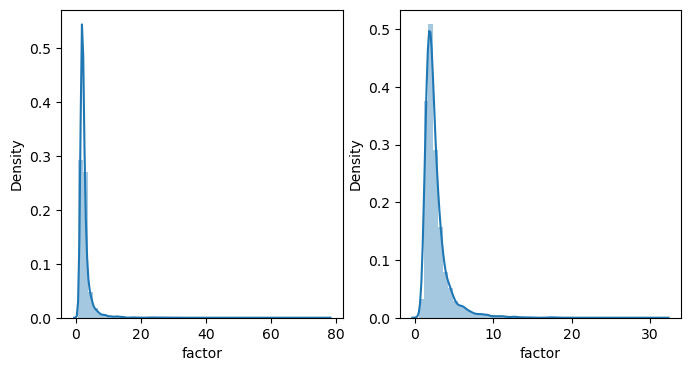

In [40]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sns.distplot(new_df['factor'], ax = ax[0])
sns.distplot(new_df2['factor'],ax = ax[1])
plt.savefig('./factor_plot.jpeg')

With or without outlier removal the mean of the factor is around 2.66. This also indicates that OSRM is not accurate. <br>
This plot tells that there are lot of values are very far from value of 1 which should be. 

### Correlation

###### on the data with outliers present

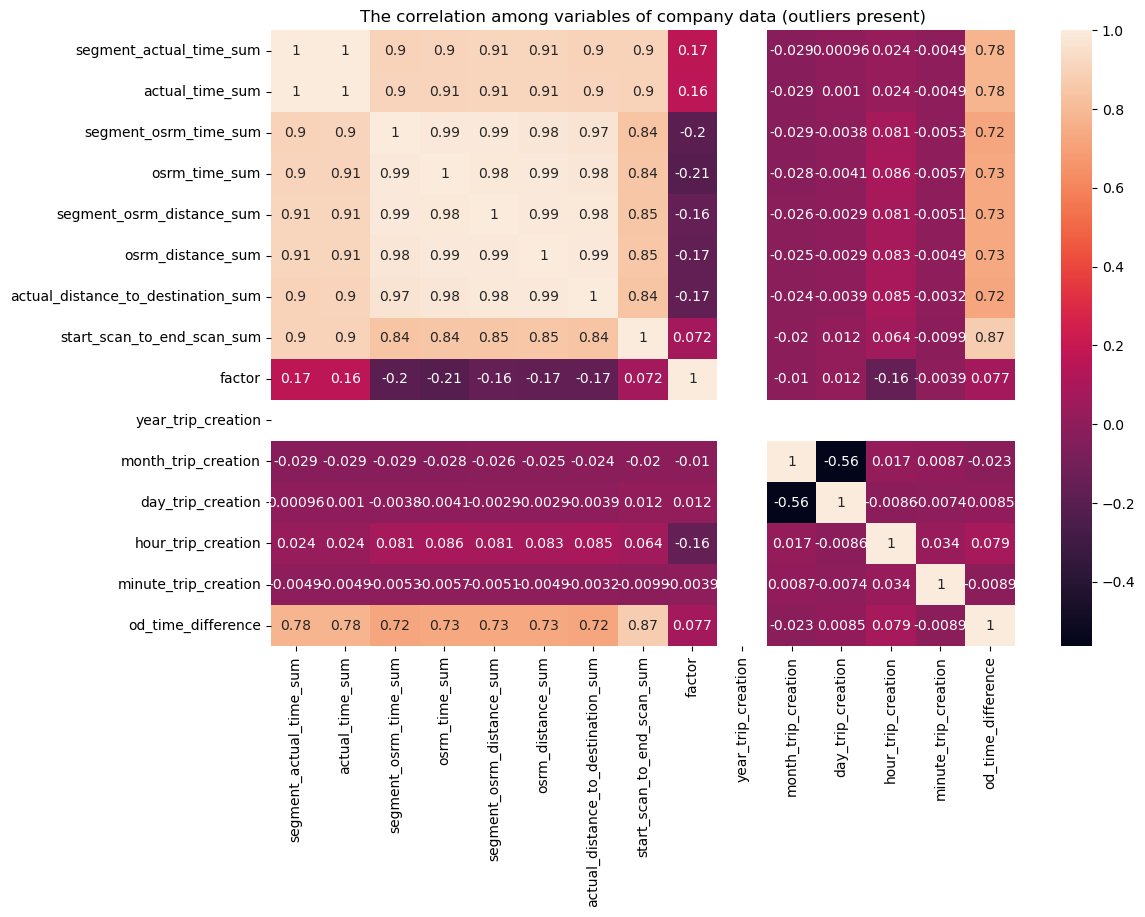

In [41]:
plt.figure(figsize = [12,8])
sns.heatmap(new_df.corr(method = "spearman"),annot = True)
plt.title("The correlation among variables of company data (outliers present)")
plt.savefig("./correlation among variables.jpg")

The heatmap shows that actual times and distances are strongly positively related to OSRM times and distances which is expected as both are trying to measure the same thing. i.e. time and distance consumed for package to reach its destination.

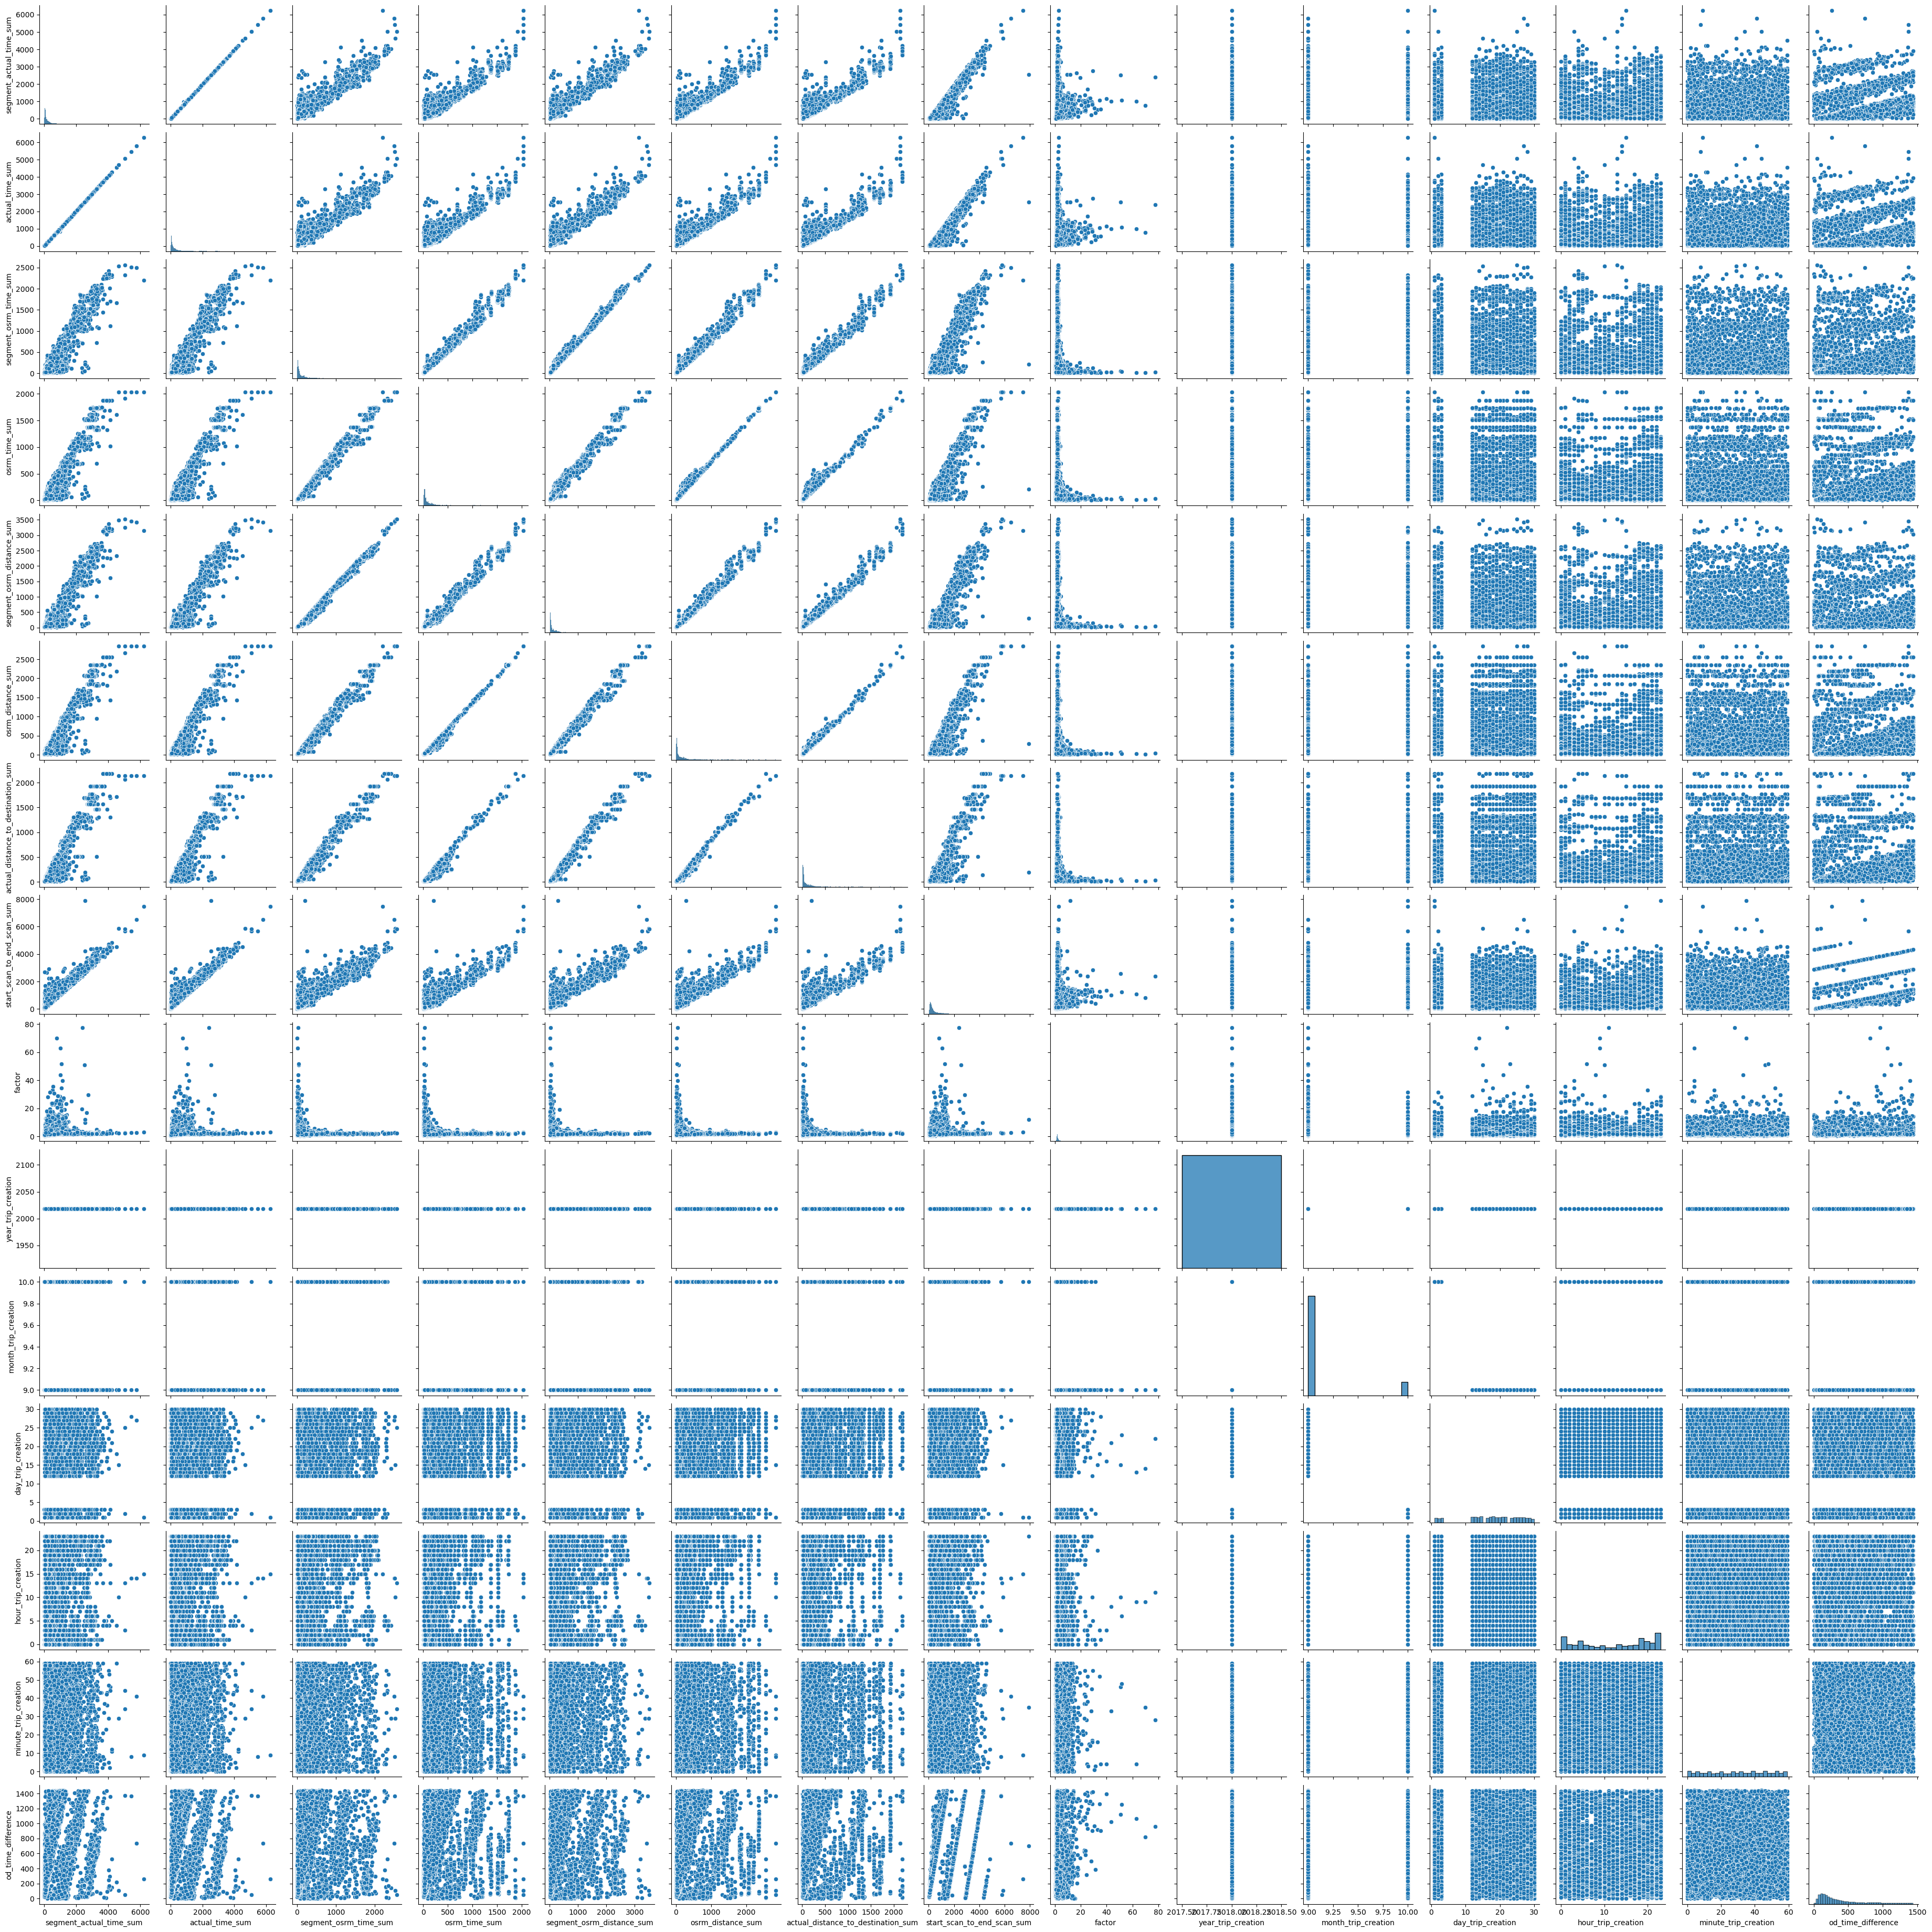

In [42]:
sns.pairplot(data = new_df)

###### on the data with outliers present

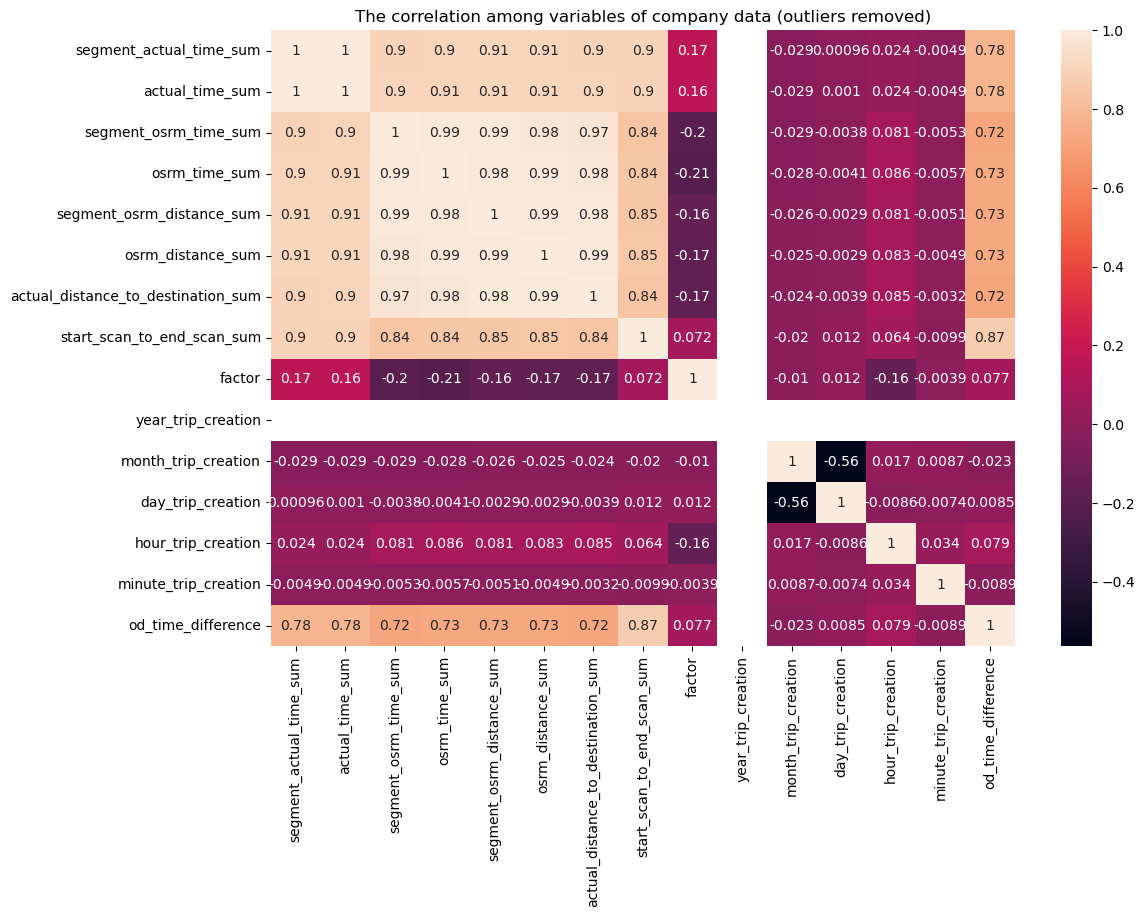

In [43]:
plt.figure(figsize = [12,8])
sns.heatmap(new_df.corr(method = "spearman"),annot = True)
plt.title("The correlation among variables of company data (outliers removed)")
plt.savefig("./correlation among variables(outliers removed).jpg")

#### Data Transormation

As we know that the data is positively skewed, we not to perform some operation on it make it normal.
So that we can perform hypothesis testing ahead using some specific tests that requires that the distribution be normal. <br>
For the sake of visual, we can see compare the distribution pre and post data transformation

In [44]:
def data_transform(database,col):
    plt.figure(figsize = (6,6))
    original_data = database[col].values
    fitted_data, fitted_lambda = stats.boxcox(original_data)
    fig, ax = plt.subplots(1, 2)
    # for original data
    sns.distplot(original_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Non-Normal", color ="green", ax = ax[0])
    # for transformed data
    sns.distplot(fitted_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Normal", color ="blue", ax = ax[1])
    
    # view of the plot
    # adding legends to the subplots
    plt.legend(loc = "upper right")
    # rescaling the subplots
    fig.set_figheight(5)
    fig.set_figwidth(10)
    print(f"Lambda value used for Transformation: {fitted_lambda}")


###### For the dataset 'new_df' where outliers are present.

Lambda value used for Transformation: 0.11413678853718867


<Figure size 600x600 with 0 Axes>

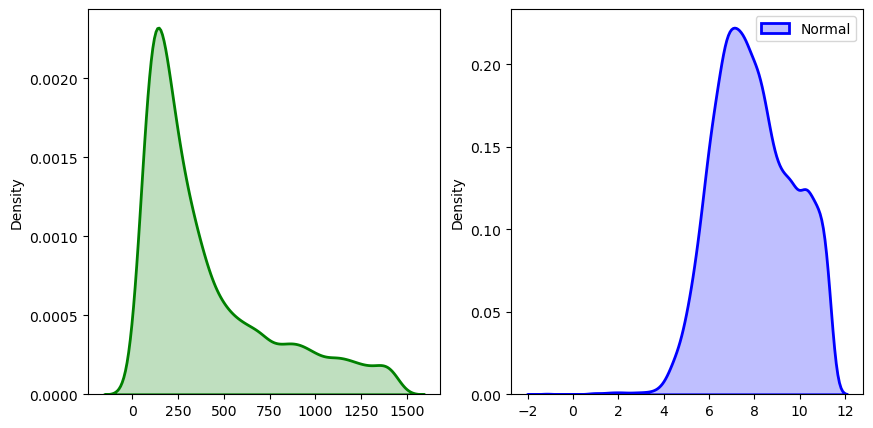

In [45]:
data_transform(new_df,'od_time_difference' )

Lambda value used for Transformation: -0.13809107502742654


<Figure size 600x600 with 0 Axes>

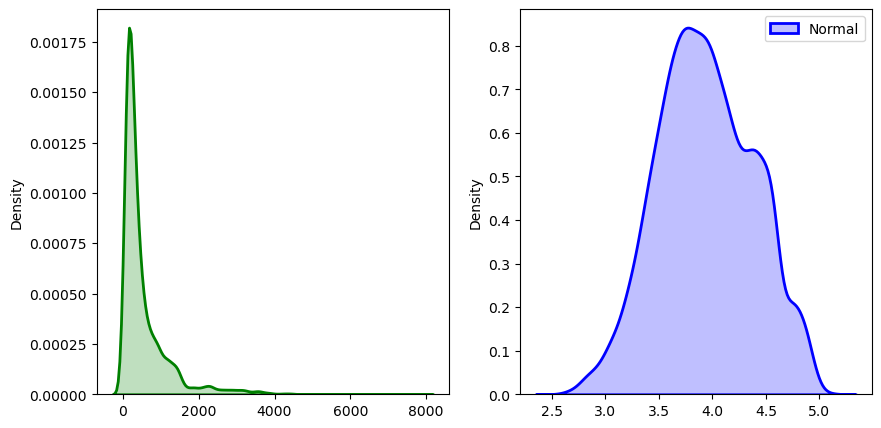

In [46]:
data_transform(new_df,"start_scan_to_end_scan_sum" )

Lambda value used for Transformation: -0.1568374607389884


<Figure size 600x600 with 0 Axes>

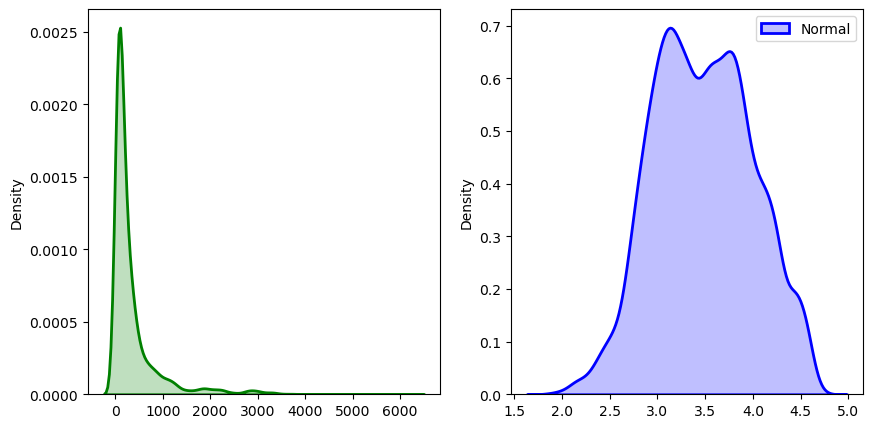

In [47]:
data_transform(new_df,'actual_time_sum' )

Lambda value used for Transformation: -0.21492904319520292


<Figure size 600x600 with 0 Axes>

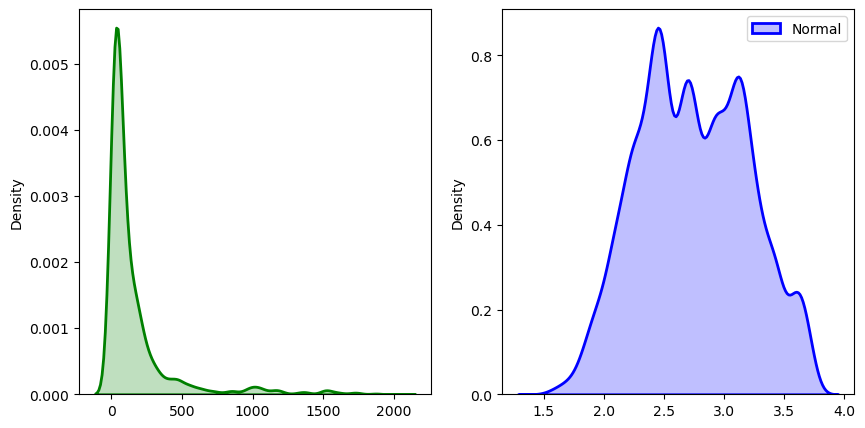

In [48]:
data_transform(new_df,'osrm_time_sum' )

Lambda value used for Transformation: -0.15699775274453295


<Figure size 600x600 with 0 Axes>

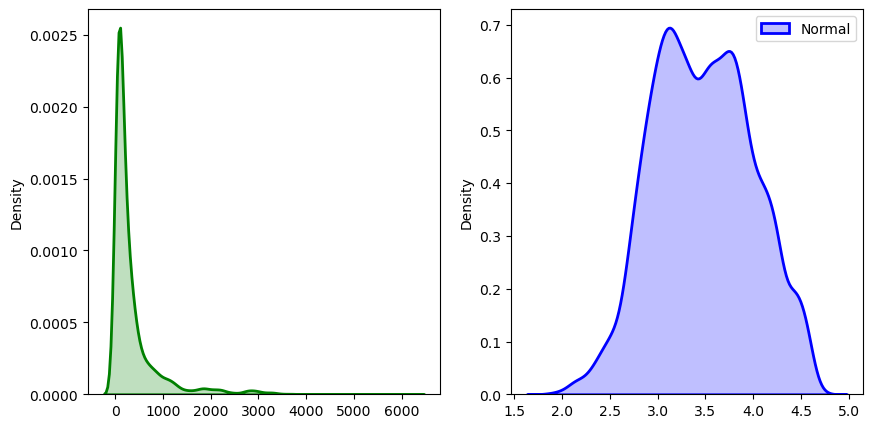

In [49]:
data_transform(new_df,'segment_actual_time_sum' )

Lambda value used for Transformation: -0.21505160812609178


<Figure size 600x600 with 0 Axes>

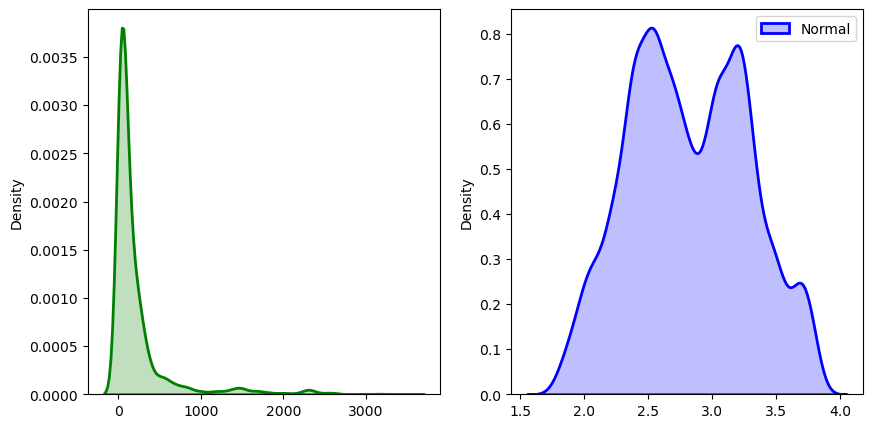

In [50]:
data_transform(new_df,'segment_osrm_distance_sum' )

Lambda value used for Transformation: -0.22869653178912216


<Figure size 600x600 with 0 Axes>

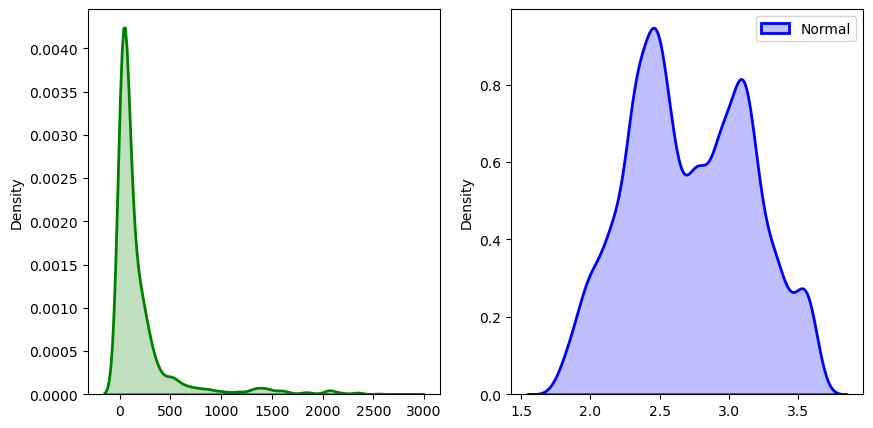

In [51]:
data_transform(new_df,'osrm_distance_sum')

Lambda value used for Transformation: -0.19352444475953948


<Figure size 600x600 with 0 Axes>

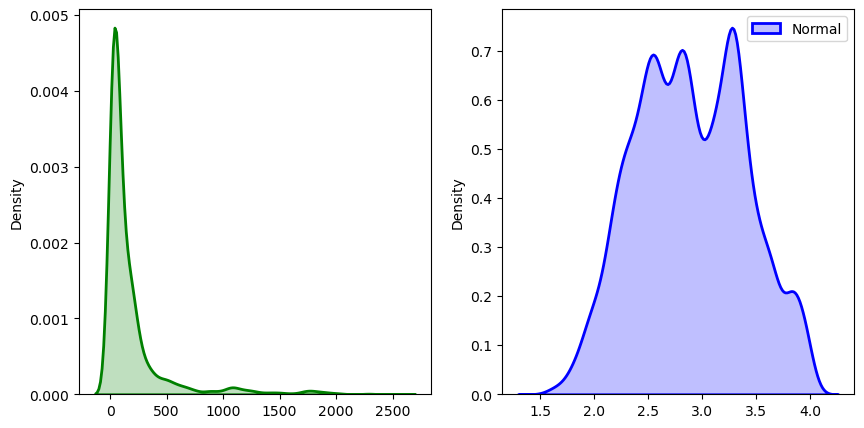

In [52]:
data_transform(new_df,'segment_osrm_time_sum')

As one can observe from the above plot that even after transforming data, the data **looks** roughly normal. Next, we'll check if the similar kind of behavior is observed for the dataset with outliers removed.

###### For the dataset 'new_df2' where outliers are NOT present.

Lambda value used for Transformation: 0.05116343102772888


<Figure size 600x600 with 0 Axes>

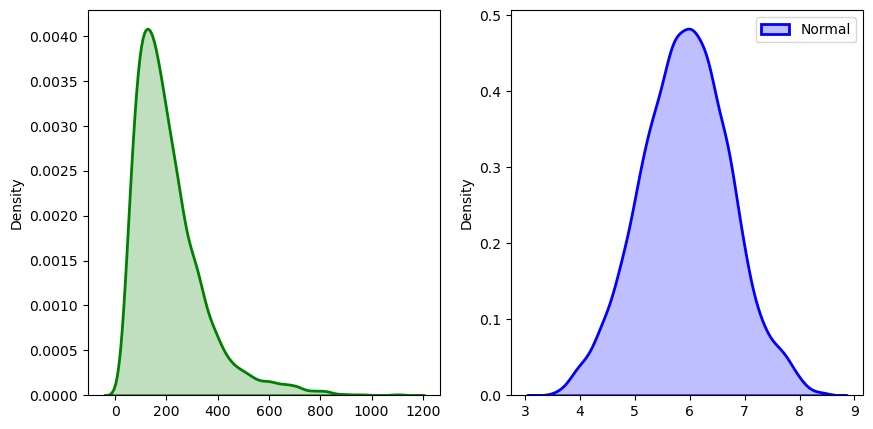

In [53]:
data_transform(new_df2,'od_time_difference' )

Lambda value used for Transformation: 0.08338980345208005


<Figure size 600x600 with 0 Axes>

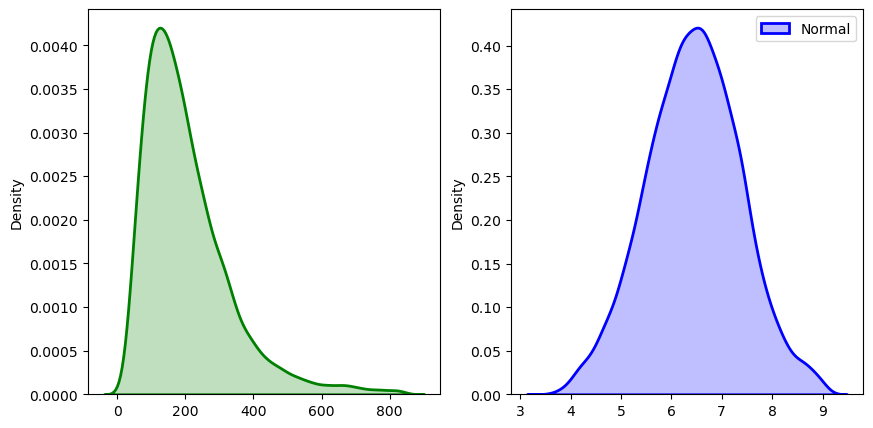

In [54]:
data_transform(new_df2,"start_scan_to_end_scan_sum" )

Lambda value used for Transformation: 0.06361546127975155


<Figure size 600x600 with 0 Axes>

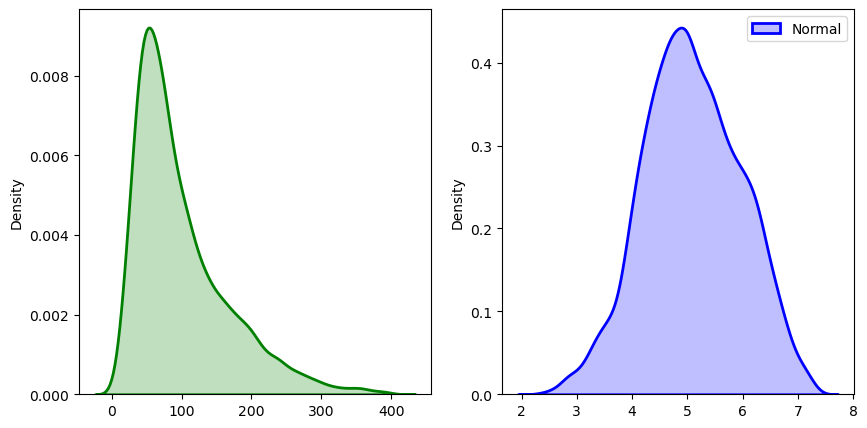

In [55]:
data_transform(new_df2,'actual_time_sum' )

Lambda value used for Transformation: 0.009018868401228735


<Figure size 600x600 with 0 Axes>

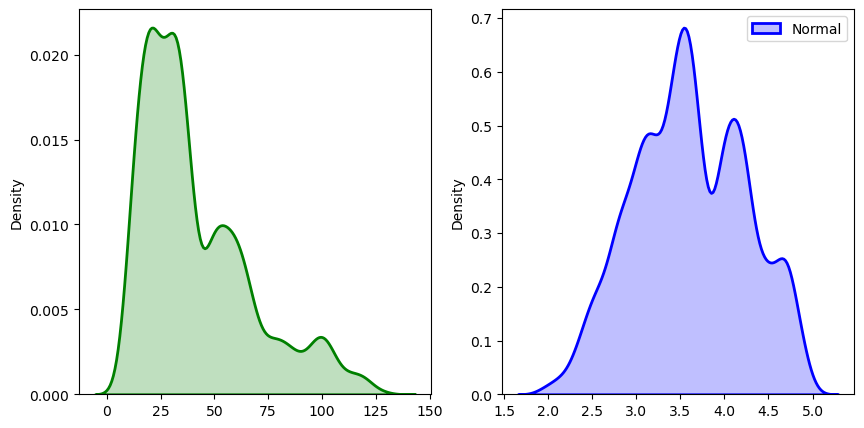

In [56]:
data_transform(new_df2,'osrm_time_sum')

Lambda value used for Transformation: 0.05872742935458984


<Figure size 600x600 with 0 Axes>

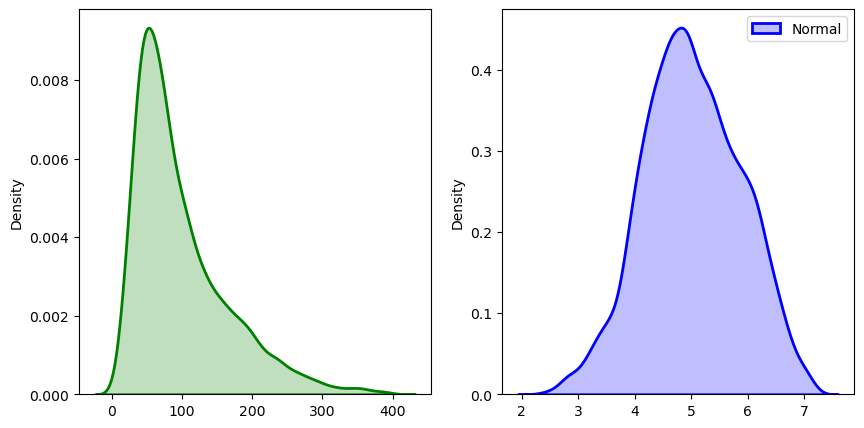

In [57]:
data_transform(new_df2,'segment_actual_time_sum' )

Lambda value used for Transformation: -0.056111177542061616


<Figure size 600x600 with 0 Axes>

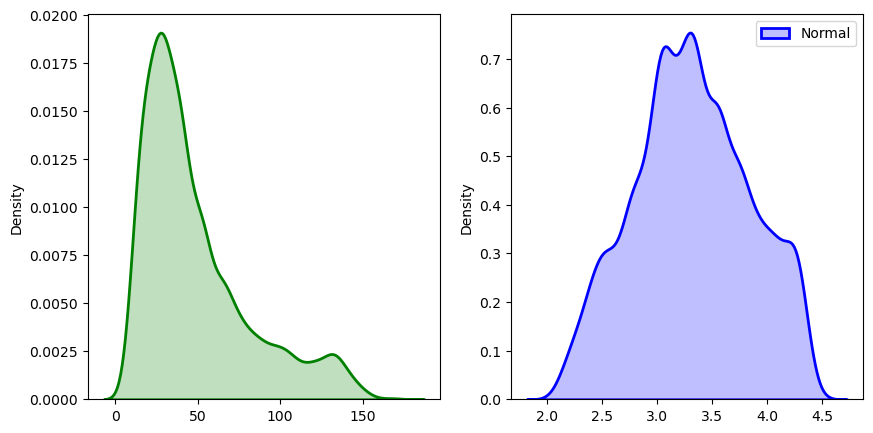

In [58]:
data_transform(new_df2,'segment_osrm_distance_sum' )

Lambda value used for Transformation: -0.12526354897240854


<Figure size 600x600 with 0 Axes>

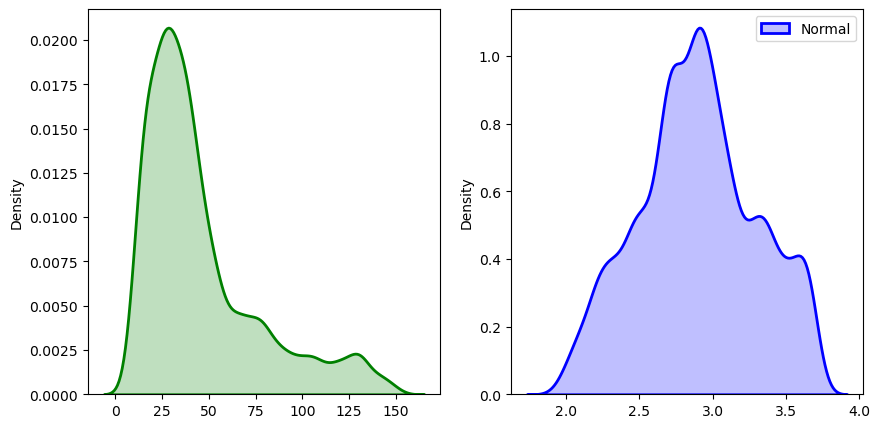

In [59]:
data_transform(new_df2,'osrm_distance_sum' )

Lambda value used for Transformation: 0.06122179002382531


<Figure size 600x600 with 0 Axes>

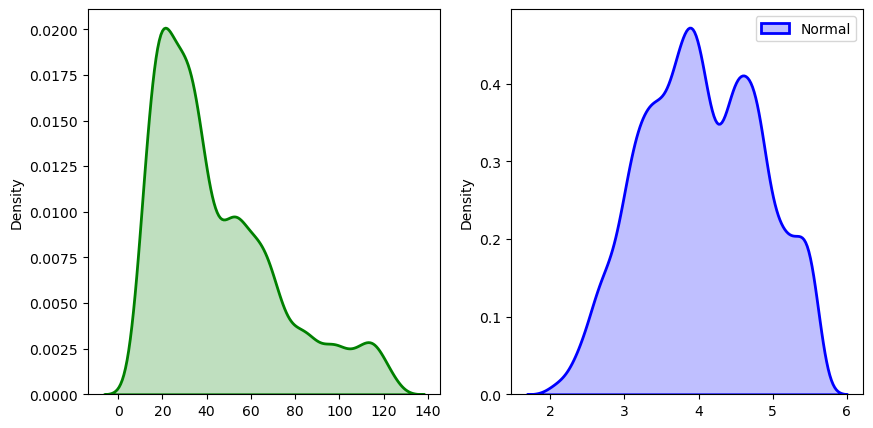

In [60]:
data_transform(new_df2,'segment_osrm_time_sum')

### Hypothesis Testing

We will perform the hypothesis tests on the two datasets with outliers not removed (represented by new_df) and using the other one with outliers removed(new_df2).

#### Declaring null and alternate hypothesis:

H0: The mean of the (**od_time_difference** :difference of the od_start_time and od_end_time) and **start_scan_end_scan** is EQUAL, <br>
Ha: The mean of the (**od_titme_difference**: difference of the od_start_time and od_end_time) and start_scan_end_scan is UNEQUAL, <br>
<br>
for this we will use t test for 5 % significance value (alpha).<br>

Assumption for the T test of independence:
- Whether two sample groups are independent or not <br>
- whether data elements in respective groups follow any normal distribution <br>
- Whether two sample have similar variance (Homogenity) <br>

######  for the data with outliers NOT removed

In [61]:
new_df[['od_time_difference','start_scan_to_end_scan_sum']].describe()

od_time_difference  start_scan_to_end_scan_sum
count        14787.000000                14787.000000
mean           403.060757                  529.399405
std            350.158002                  658.201130
min              0.250000                   23.000000
25%            144.308500                  149.000000
50%            267.650000                  279.000000
75%            564.467000                  632.000000
max           1439.683000                 7898.000000

var of "fitted_od_time_diff" :  2.9960408766418447
var of "fitted_start_scan_end_scan" :  0.2003849692669973
samples have Un-equal variance


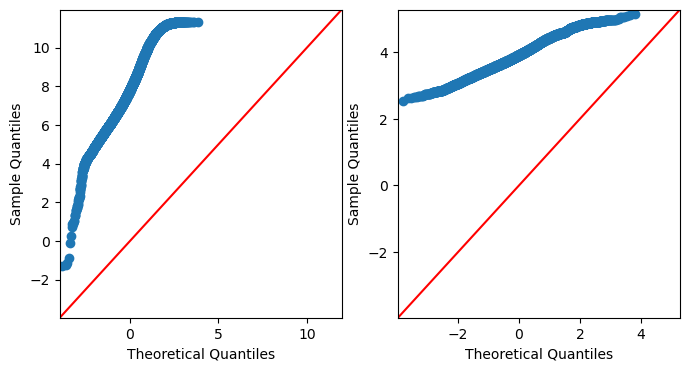

In [62]:
# transforming the data 
fitted_od_time_diff, lambda_od_time_diff = stats.boxcox(new_df['od_time_difference'])
fitted_start_scan_end_scan, lamda_start_scan_end_scan = stats.boxcox(new_df['start_scan_to_end_scan_sum'])

# Check for the assumption of the t test

# check for variance/homogenity
a = np.var(fitted_od_time_diff)
b = np.var(fitted_start_scan_end_scan)
print('var of "fitted_od_time_diff" : ', a)
print('var of "fitted_start_scan_end_scan" : ', b)
ratio = a/b
if ratio > 4 :
    print('samples have Un-equal variance')
else:
    print('samples have equal variance')

# check for normality
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sm.qqplot(fitted_od_time_diff, line ='45', ax = ax[0])
sm.qqplot(fitted_start_scan_end_scan, line ='45', ax = ax[1])
py.show()

Hence, we can say that without removal of outliers, the distribution is NOT normal for either of the distributions of the samples. Thus it fails the assumption of normality and homogenity (equal variance) <br>
However, we'll still apply t test to have a rough idea about the mean of the two samples. Still, one needs to keep in mind that any conclusion drawn post T test, it won't be reliable.

In [63]:
# 2 sample t test
stats.ttest_ind(fitted_od_time_diff,fitted_start_scan_end_scan, equal_var = False )

Ttest_indResult(statistic=274.1396677390508, pvalue=0.0)

Hence, we can reject our null hypothesis and we can conclude (roughly) that the two distribution don't have same mean. However, this result is not reliable as the assumption of the t test failed. And whenever this happend we need to use some better and superior methods for hypothesis testing. 

######  for the data with outliers removed

 running hypothesis test without transforming the data to see how the tests performs.

Check for the assumption of the t test
var of "od_time_difference" :  19062.095973452408
var of "start_scan_to_end_scan_sum" :  16369.407341181459
samples have equal variance


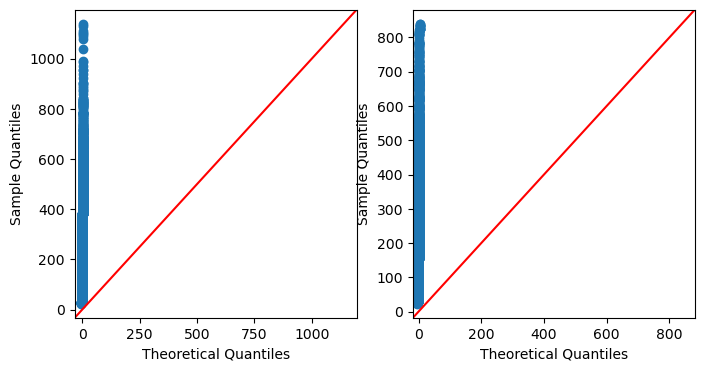

In [64]:
print("Check for the assumption of the t test")

# check for variance/homogenity
a = np.var(new_df2['od_time_difference'])
b = np.var(new_df2['start_scan_to_end_scan_sum'])
print('var of "od_time_difference" : ', a)
print('var of "start_scan_to_end_scan_sum" : ', b)
ratio = a/b
if ratio > 4 :
    print('samples have Un-equal variance')
else:
    print('samples have equal variance')

# check for normality
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sm.qqplot(new_df2['od_time_difference'], line ='45', ax = ax[0])
sm.qqplot(new_df2['start_scan_to_end_scan_sum'], line ='45', ax = ax[1])
py.show()

In [65]:
# 2 sample t test
stats.ttest_ind(new_df2['od_time_difference'],new_df2['start_scan_to_end_scan_sum'], equal_var = True )

Ttest_indResult(statistic=3.349020870777277, pvalue=0.0008126080852356419)

Reject the null hypothesis as the p value < 0.05. however conclusion is not reliable as the test of normality (one of the assumption of the  t test failed.)

Running the hypothesis test with the transformed data.

Check for the assumption of the t test
var of "fitted_od_time_diff2" :  0.6573854896728466
var of "fitted_start_scan_end_scan2" :  0.8710901202548326
samples have equal variance


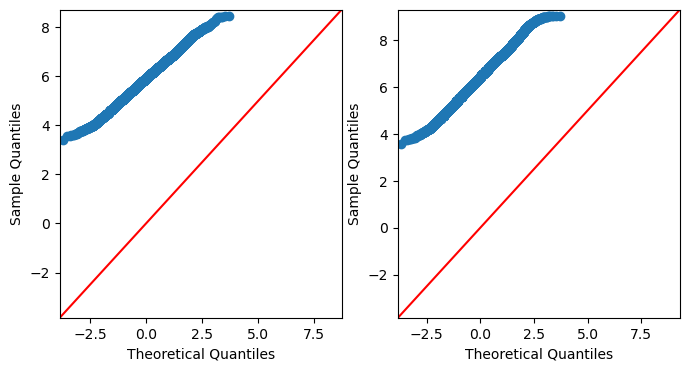

In [66]:
# transforming the data 
fitted_od_time_diff2, lambda_fitted_od_time_diff2 = stats.boxcox(new_df2['od_time_difference'])
fitted_start_scan_end_scan2, lamda_start_scan_end_scan2 = stats.boxcox(new_df2['start_scan_to_end_scan_sum']) 
np.std(fitted_od_time_diff2)

print("Check for the assumption of the t test")

# check for variance/homogenity
a = np.var(fitted_od_time_diff2)
b = np.var(fitted_start_scan_end_scan2)
print('var of "fitted_od_time_diff2" : ', a)
print('var of "fitted_start_scan_end_scan2" : ', b)
ratio = a/b
if ratio > 4 :
    print('samples have Un-equal variance')
else:
    print('samples have equal variance')

# check for normality
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sm.qqplot(fitted_od_time_diff2, line ='45', ax = ax[0])
sm.qqplot(fitted_start_scan_end_scan2, line ='45', ax = ax[1])
py.show()

In [67]:
# 2 sample t test
stats.ttest_ind(fitted_od_time_diff2,fitted_start_scan_end_scan2, equal_var = True )

Ttest_indResult(statistic=-40.320966396339514, pvalue=0.0)

reject the null hypothesis as the p value is less than zero. Results not reliable as the one of the assumptions failed.

H0: The mean of the actual_time and osrm_time is EQUAL, <br>
Ha: The mean of the  actual_time and osrm_time is UNEQUAL, <br>
for this we will again use t test for 5 % significance value.<br>

######  for the data with outliers NOT removed

Check for the assumption of the t test
var of "fitted_actual_time_sum" :  0.2670845964176727
var of "fitted_osrm_time_sum" :  0.2071314423813352
samples have equal variance


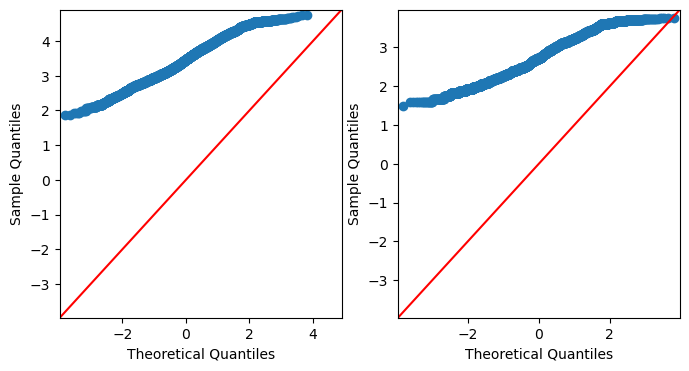

In [68]:
# transforming the data 
fitted_actual_time_sum, lambda_actual_time_sum = stats.boxcox(new_df['actual_time_sum'])
fitted_osrm_time_sum, lamda_osrm_time_sum = stats.boxcox(new_df['osrm_time_sum'])

print("Check for the assumption of the t test")

# check for variance/homogenity
a = np.var(fitted_actual_time_sum)
b = np.var(fitted_osrm_time_sum)
print('var of "fitted_actual_time_sum" : ', a)
print('var of "fitted_osrm_time_sum" : ', b)
ratio = a/b
if ratio > 4 :
    print('samples have Un-equal variance')
else:
    print('samples have equal variance')

# check for normality
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sm.qqplot(fitted_actual_time_sum, line ='45', ax = ax[0])
sm.qqplot(fitted_osrm_time_sum, line ='45', ax = ax[1])
py.show()

Based on the QQ plots shown above we can say that the 'actual_time' and 'osrm_time' variables given
are not normally distribution. Hence, it violates the assumption of T test. <br>
Still we'll perform the t test to get the rough idea about the means of the two variables keeping in mind that the results won't be reliable.

In [69]:
# 2 sample t test
stats.ttest_ind(fitted_actual_time_sum,fitted_osrm_time_sum, equal_var = True )

Ttest_indResult(statistic=129.0588001665191, pvalue=0.0)

Since the p-value < 0.05, we can reject the null hypothesis. We can say that the population mean of the two variables will be very different.

######  for the data with outliers removed

Check for the assumption of the t test
var of "fitted_actual_time_sum2" :  0.7699668592866798
var of "fitted_osrm_time_sum2" :  0.40066248894027495
samples have equal variance


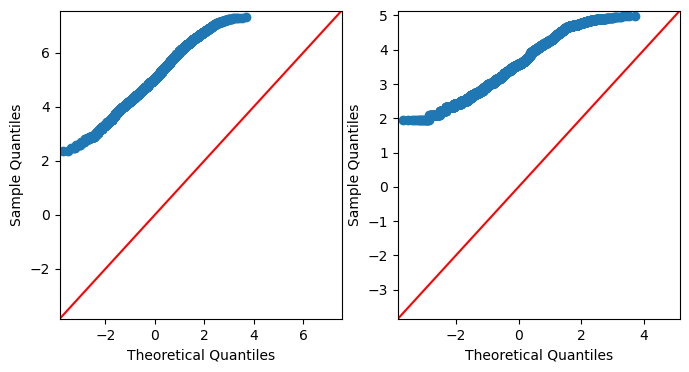

In [70]:
# transforming the data 
fitted_actual_time_sum2, lambda_actual_time_sum2 = stats.boxcox(new_df2['actual_time_sum'])
fitted_osrm_time_sum2, lamda_osrm_time_sum2 = stats.boxcox(new_df2['osrm_time_sum'])

print("Check for the assumption of the t test")

# check for variance/homogenity
a = np.var(fitted_actual_time_sum2)
b = np.var(fitted_osrm_time_sum2)
print('var of "fitted_actual_time_sum2" : ', a)
print('var of "fitted_osrm_time_sum2" : ', b)
ratio = a/b
if ratio > 4 :
    print('samples have Un-equal variance')
else:
    print('samples have equal variance')

# check for normality
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sm.qqplot(fitted_actual_time_sum2, line ='45', ax = ax[0])
sm.qqplot(fitted_osrm_time_sum2, line ='45', ax = ax[1])
py.show()

The above plot shows that the two variables are not normally distributed.Hence, the third assumption of the test failed.

In [71]:
# 2 sample t test
stats.ttest_ind(fitted_actual_time_sum2,fitted_osrm_time_sum2, equal_var = True )

Ttest_indResult(statistic=131.53361976108243, pvalue=0.0)

H0: The mean of the  actual_time and segement_actual_time is EQUAL, <br>
Ha: The mean of the  actual_time and segement_actual_time is UNEQUAL, <br>
for this we will again use t test for 5 % significance value.<br>

######  for the data with outliers NOT removed

Check for the assumption of the t test
var of "fitted_actual_time_sum" :  0.2670845964176727
var of "fitted_osrm_time_sum" :  0.26816926140781544
samples have equal variance


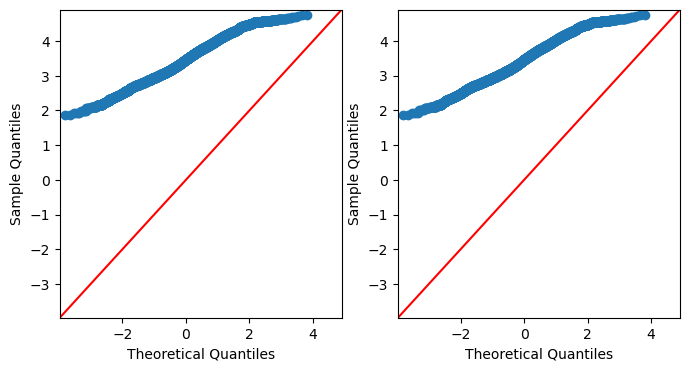

In [72]:
# transforming the data 
fitted_actual_time_sum, lambda_actual_time_sum = stats.boxcox(new_df['actual_time_sum'])
fitted_segment_actual_time_sum, lamda_segment_actual_time_sum = stats.boxcox(new_df['segment_actual_time_sum'])

print("Check for the assumption of the t test")

# check for variance/homogenity
a = np.var(fitted_actual_time_sum)
b = np.var(fitted_segment_actual_time_sum)
print('var of "fitted_actual_time_sum" : ', a)
print('var of "fitted_osrm_time_sum" : ', b)
ratio = a/b
if ratio > 4 :
    print('samples have Un-equal variance')
else:
    print('samples have equal variance')

# check for normality
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sm.qqplot(fitted_actual_time_sum, line ='45', ax = ax[0])
sm.qqplot(fitted_segment_actual_time_sum, line ='45', ax = ax[1])
py.show()

hence we can say that even after transforming the data the distribution is not normal. And hence the third assumption failed

In [73]:
# 2 sample t test
stats.ttest_ind(fitted_actual_time_sum,fitted_osrm_time_sum, equal_var = True )

Ttest_indResult(statistic=129.0588001665191, pvalue=0.0)

Reject the null hypothesis as p values < 0.05 and hence we can say that the 'segment actual time' and actual time' doesn't share the same relationships.

######  for the data with outliers removed

Check for the assumption of the t test
var of "fitted_actual_time_sum2" :  0.7699668592866798
var of "fitted_segment_actual_time_sum2" :  0.7395061936962533
samples have equal variance


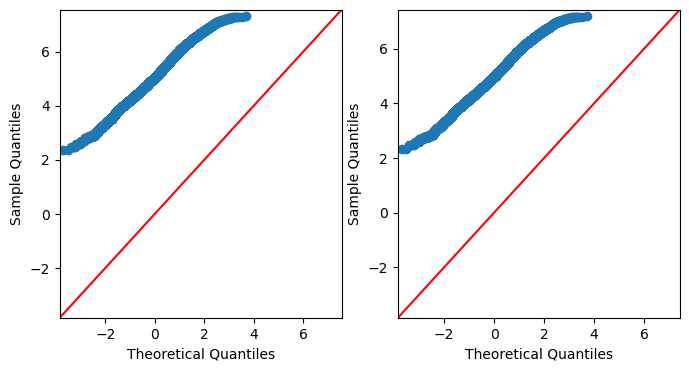

In [74]:
# transforming the data 
fitted_actual_time_sum2, lambda_actual_time_sum2 = stats.boxcox(new_df2['actual_time_sum'])
fitted_segment_actual_time_sum2, lamda_osrm_time_sum2 = stats.boxcox(new_df2['segment_actual_time_sum'])

print("Check for the assumption of the t test")

# check for variance/homogenity
a = np.var(fitted_actual_time_sum2)
b = np.var(fitted_segment_actual_time_sum2)
print('var of "fitted_actual_time_sum2" : ', a)
print('var of "fitted_segment_actual_time_sum2" : ', b)
ratio = a/b
if ratio > 4 :
    print('samples have Un-equal variance')
else:
    print('samples have equal variance')

# check for normality
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sm.qqplot(fitted_actual_time_sum2, line ='45', ax = ax[0])
sm.qqplot(fitted_segment_actual_time_sum2, line ='45', ax = ax[1])
py.show()

assumption of normality check using QQ plot failed for the above mentioned variables as well.

In [75]:
# 2 sample t test
stats.ttest_ind(fitted_actual_time_sum,fitted_osrm_time_sum, equal_var = True )

Ttest_indResult(statistic=129.0588001665191, pvalue=0.0)

Reject the null hypothesis however, results aren't reliable because the third assumption of the 2 sample t test failed.

H0: The mean of the osrm_distance and segment_osrm_distance is EQUAL, <br>
Ha: The mean of the  actual_time and osrm_time is UNEQUAL, <br>
for this we will again use t test for 5 % significance value.<br>

######  for the data with outliers NOT removed

Check for the assumption of the t test
var of "fitted_osrm_distance_sum" :  0.1921626964099047
var of "fitted_segment_osrm_distance_sum" :  0.21574443994816497
samples have equal variance


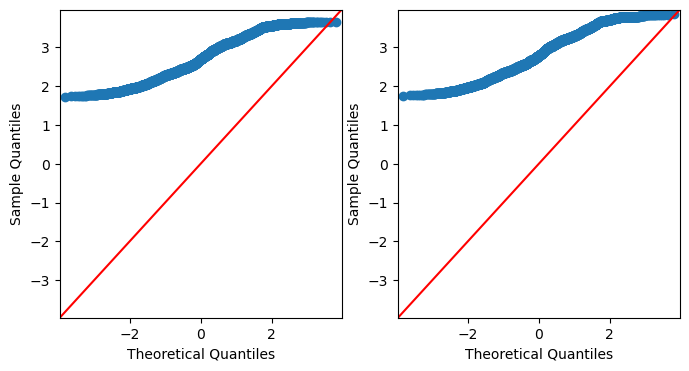

In [76]:
# transforming the data 
fitted_osrm_distance_sum, lambda_osrm_distance_sum = stats.boxcox(new_df['osrm_distance_sum'])
fitted_segment_osrm_distance_sum, lamda_segment_osrm_distance_sum = stats.boxcox(new_df['segment_osrm_distance_sum'])

print("Check for the assumption of the t test")

# check for variance/homogenity
a = np.var(fitted_osrm_distance_sum)
b = np.var(fitted_segment_osrm_distance_sum)
print('var of "fitted_osrm_distance_sum" : ', a)
print('var of "fitted_segment_osrm_distance_sum" : ', b)
ratio = a/b
if ratio > 4 :
    print('samples have Un-equal variance')
else:
    print('samples have equal variance')

# check for normality
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sm.qqplot(fitted_osrm_distance_sum, line ='45', ax = ax[0])
sm.qqplot(fitted_segment_osrm_distance_sum, line ='45', ax = ax[1])
py.show()

here again third assumption of the t test failed as both of them don't have normal distribution.

In [77]:
# 2 sample t test
stats.ttest_ind(fitted_actual_time_sum,fitted_osrm_time_sum, equal_var = True )

Ttest_indResult(statistic=129.0588001665191, pvalue=0.0)

Again we'll reject the null hypothesis and we can conclude that osrm distance and segment osrm distance doesn't have same relationship as the p values of the test is less than 0.05. 
However, once again this test isnot reliable cause the third assumption of the t test failed.

######  for the data with outliers removed

Check for the assumption of the t test
var of "fitted_osrm_distance_sum2" :  0.7699668592866798
var of "fitted_segment_osrm_distance_sum2" :  0.7395061936962533
samples have equal variance


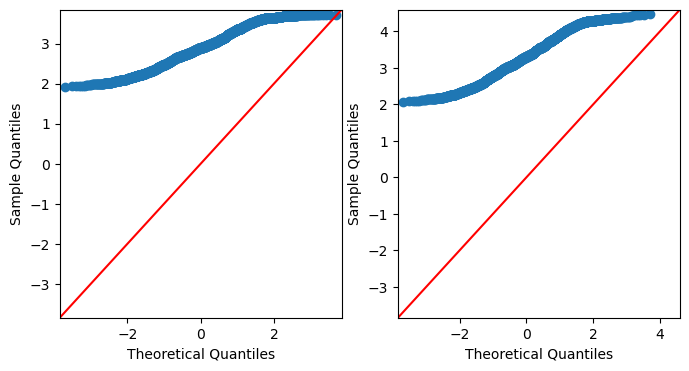

In [78]:
# transforming the data 
fitted_osrm_distance_sum2, lambda_osrm_distance_sum2 = stats.boxcox(new_df2['osrm_distance_sum'])
fitted_segment_osrm_distance_sum2, lamda_segment_osrm_distance_sum2 = stats.boxcox(new_df2['segment_osrm_distance_sum'])

print("Check for the assumption of the t test")

# check for variance/homogenity
a = np.var(fitted_actual_time_sum2)
b = np.var(fitted_segment_actual_time_sum2)
print('var of "fitted_osrm_distance_sum2" : ', a)
print('var of "fitted_segment_osrm_distance_sum2" : ', b)
ratio = a/b
if ratio > 4 :
    print('samples have Un-equal variance')
else:
    print('samples have equal variance')

# check for normality
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sm.qqplot(fitted_osrm_distance_sum2, line ='45', ax = ax[0])
sm.qqplot(fitted_segment_osrm_distance_sum2, line ='45', ax = ax[1])
py.show()

Third assumption of normality failed for the above mentioned variables as well.

In [79]:
# 2 sample t test
stats.ttest_ind(fitted_actual_time_sum,fitted_osrm_time_sum, equal_var = True )

Ttest_indResult(statistic=129.0588001665191, pvalue=0.0)

Reject the null hypothesis, however again, conclusion drawn is not reliable as the 2 sample t test failed.

H0: The mean of the osrm_time and segment_osrm_time are EQUAL, <br>
Ha: The mean of the  osrm_time and segment_osrm_time are UNEQUAL, <br>
for this we will again use t test for 5 % significance value.<br>

######  for the data with outliers NOT removed

Check for the assumption of the t test
var of "fitted_osrm_time_sum" :  0.2071314423813352
var of "fitted_segment_osrm_time_sum" :  0.2562975493226094
samples have equal variance


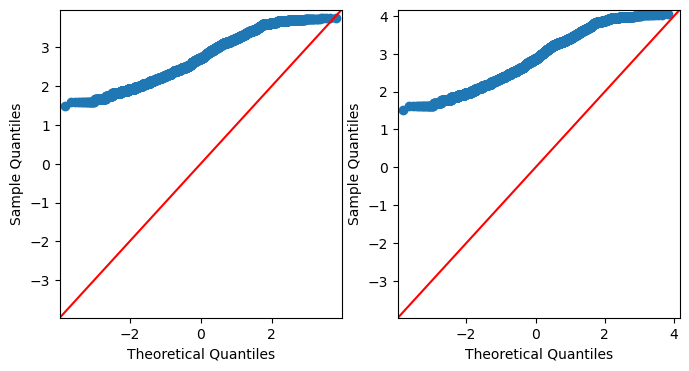

In [80]:
# transforming the data 
fitted_osrm_time_sum, lambda_osrm_time_sum = stats.boxcox(new_df['osrm_time_sum'])
fitted_segment_osrm_time_sum, lamda_segment_osrm_time_sum = stats.boxcox(new_df['segment_osrm_time_sum'])

print("Check for the assumption of the t test")

# check for variance/homogenity
a = np.var(fitted_osrm_time_sum)
b = np.var(fitted_segment_osrm_time_sum)
print('var of "fitted_osrm_time_sum" : ', a)
print('var of "fitted_segment_osrm_time_sum" : ', b)
ratio = a/b
if ratio > 4 :
    print('samples have Un-equal variance')
else:
    print('samples have equal variance')

# check for normality
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sm.qqplot(fitted_osrm_time_sum, line ='45', ax = ax[0])
sm.qqplot(fitted_segment_osrm_time_sum, line ='45', ax = ax[1])
py.show()

The third assumption of homogenity for the 2 sample t test failed as both the distributions aren't normal.

In [81]:
# 2 sample t test
stats.ttest_ind(fitted_osrm_time_sum,fitted_segment_osrm_time_sum, equal_var = True )

Ttest_indResult(statistic=-25.83464628270156, pvalue=1.4958561227932825e-145)

We'll reject the null hypothesis as the p values is less than 0.05. Hence, we can say (roughly) that the osrm time and segment osrm time have different means and do not have the same relationship. <br>
However, this test is not reliable as the third assumption failed and hence its conclusions.

######  for the data with outliers removed

Check for the assumption of the t test
var of "fitted_osrm_time_sum2" :  0.40066248894027495
var of "fitted_segment_osrm_time_sum2" :  0.6301208030841194
samples have equal variance


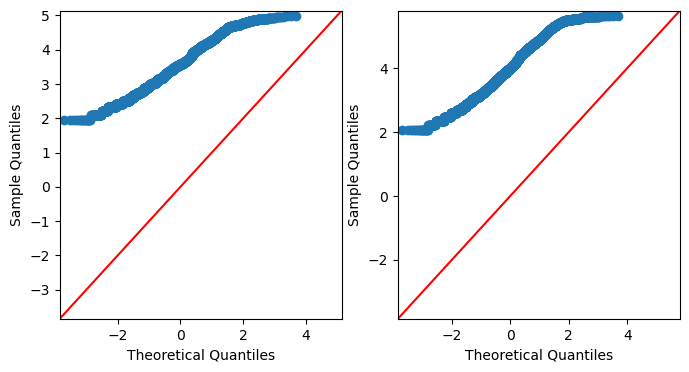

In [82]:
# transforming the data 
fitted_osrm_time_sum2, lambda_osrm_time_sum2 = stats.boxcox(new_df2['osrm_time_sum'])
fitted_segment_osrm_time_sum2, lamda_segment_osrm_time_sum2 = stats.boxcox(new_df2['segment_osrm_time_sum'])

print("Check for the assumption of the t test")

# check for variance/homogenity
a = np.var(fitted_osrm_time_sum2)
b = np.var(fitted_segment_osrm_time_sum2)
print('var of "fitted_osrm_time_sum2" : ', a)
print('var of "fitted_segment_osrm_time_sum2" : ', b)
ratio = a/b
if ratio > 4 :
    print('samples have Un-equal variance')
else:
    print('samples have equal variance')

# check for normality
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
sm.qqplot(fitted_osrm_time_sum2, line ='45', ax = ax[0])
sm.qqplot(fitted_segment_osrm_time_sum2, line ='45', ax = ax[1])
py.show()

The third assumption of the t test failed for the above mentioned variables as well.

In [83]:
# 2 sample t test
stats.ttest_ind(fitted_osrm_time_sum2,fitted_segment_osrm_time_sum2, equal_var = True )

Ttest_indResult(statistic=-41.57551651329353, pvalue=0.0)

Reject the null hypothesis and hence we can (roughly) conclude the two mentioned above variables don't have same relationship. However, results are not reliables as assumption of normality of t test failed.

### Handling of categorical variables using one hot encoding

In the data set of condensed dataframe of the given data i.e. new_df have 'route_type' that have 2 unique values 'carting' and 'FTL'

In [84]:
new_df['route_type_first'].unique()

array(['Carting', 'FTL'], dtype=object)

Now we'll perform the one hot encoding for this variable.

In [85]:
from sklearn.preprocessing import OneHotEncoder

In [86]:
# creating instance of one hot encoder
encoder = OneHotEncoder(handle_unknown = 'ignore')

# Next, applying this on new_df['route_type_first'] column
encoder_df = pd.DataFrame(encoder.fit_transform(new_df[['route_type_first']]).toarray())

# Finally merging the one hot encoded columns back to new_df dataframe
new_df = new_df.join(encoder_df)
new_df

trip_uuid source_center destination_center  \
0      trip-153741093647649320  IND388121AAA       IND388320AAA   
1      trip-153768492602129387  IND421302AAG       IND411033AAA   
2      trip-153693976643699843  IND400011AAA       IND400072AAD   
3      trip-153687145942424248  IND562132AAA       IND683511AAA   
4      trip-153825970514894360  IND141003AAB       IND000000ACA   
...                        ...           ...                ...   
14782  trip-153799142965708367  IND454001AAA       IND382430AAB   
14783  trip-153695073416451616  IND400102AAB       IND421302AAG   
14784  trip-153761584139918815  IND421302AAG       IND411033AAA   
14785  trip-153718412883843340  IND600056AAB       IND600032AAB   
14786  trip-153746066843555182  IND131028AAB       IND000000ACB   

        trip_creation_time_first  segment_actual_time_sum  actual_time_sum  \
0     2018-09-20 02:35:36.476840                    167.0            170.0   
1     2018-09-23 06:42:06.021680                    180.0            183.0   
2     2018-09-14 15:42:46.437249                     60.0             60.0   
3     2018-09-13 20:44:19.424489                    799.0            805.0   
4     2018-09-29 22:21:45.149226                    151.0            152.0   
...                          ...                      ...              ...   
14782 2018-09-26 19:50:29.657378                    617.0            625.0   
14783 2018-09-14 18:45:34.164734                    344.0            344.0   
14784 2018-09-22 11:30:41.399439                    288.0            289.0   
14785 2018-09-17 11:35:28.838714                     82.0             84.0   
14786 2018-09-20 16:24:28.436231                    423.0            426.0   

       segment_osrm_time_sum  osrm_time_sum        od_start_time_first  \
0                       88.0           89.0 2018-09-20 03:21:32.418600   
1                      106.0           95.0 2018-09-23 06:42:06.021680   
2                       16.0           16.0 2018-09-14 15:42:46.437249   
3                      502.0          486.0 2018-09-13 20:44:19.424489   
4                      137.0          123.0 2018-09-30 02:22:04.138164   
...                      ...            ...                        ...   
14782                  507.0          423.0 2018-09-27 02:48:14.315366   
14783                   36.0           31.0 2018-09-14 18:45:34.164734   
14784                  111.0           95.0 2018-09-22 11:30:41.399439   
14785                   31.0           33.0 2018-09-17 11:35:28.838714   
14786                  185.0           95.0 2018-09-20 16:24:28.436231   

                od_end_time_last  ...  date_trip_creation  year_trip_creation  \
0     2018-09-20 06:36:55.627764  ...          2018-09-20                2018   
1     2018-09-23 11:44:28.365845  ...          2018-09-23                2018   
2     2018-09-14 17:31:45.368791  ...          2018-09-14                2018   
3     2018-09-14 13:55:58.765334  ...          2018-09-13                2018   
4     2018-09-30 06:44:42.320422  ...          2018-09-29                2018   
...                          ...  ...                 ...                 ...   
14782 2018-09-27 17:18:35.292509  ...          2018-09-26                2018   
14783 2018-09-15 01:19:26.775457  ...          2018-09-14                2018   
14784 2018-09-22 21:45:05.128533  ...          2018-09-22                2018   
14785 2018-09-17 13:32:21.128357  ...          2018-09-17                2018   
14786 2018-09-20 23:32:09.618069  ...          2018-09-20                2018   

       month_trip_creation day_trip_creation time_trip_creation  \
0                        9                20    02:35:36.476840   
1                        9                23    06:42:06.021680   
2                        9                14    15:42:46.437249   
3                        9                13    20:44:19.424489   
4                        9                29    22:21:45.149226   
...            

One hot encoding for other columns is not performed as this would lead to addition of thousands of column in the main dataframe and that is memory not feasible.

In [87]:
new_df.head()

trip_uuid source_center destination_center  \
0  trip-153741093647649320  IND388121AAA       IND388320AAA   
1  trip-153768492602129387  IND421302AAG       IND411033AAA   
2  trip-153693976643699843  IND400011AAA       IND400072AAD   
3  trip-153687145942424248  IND562132AAA       IND683511AAA   
4  trip-153825970514894360  IND141003AAB       IND000000ACA   

    trip_creation_time_first  segment_actual_time_sum  actual_time_sum  \
0 2018-09-20 02:35:36.476840                    167.0            170.0   
1 2018-09-23 06:42:06.021680                    180.0            183.0   
2 2018-09-14 15:42:46.437249                     60.0             60.0   
3 2018-09-13 20:44:19.424489                    799.0            805.0   
4 2018-09-29 22:21:45.149226                    151.0            152.0   

   segment_osrm_time_sum  osrm_time_sum        od_start_time_first  \
0                   88.0           89.0 2018-09-20 03:21:32.418600   
1                  106.0           95.0 2018-09-23 06:42:06.021680   
2                   16.0           16.0 2018-09-14 15:42:46.437249   
3                  502.0          486.0 2018-09-13 20:44:19.424489   
4                  137.0          123.0 2018-09-30 02:22:04.138164   

            od_end_time_last  ...  date_trip_creation  year_trip_creation  \
0 2018-09-20 06:36:55.627764  ...          2018-09-20                2018   
1 2018-09-23 11:44:28.365845  ...          2018-09-23                2018   
2 2018-09-14 17:31:45.368791  ...          2018-09-14                2018   
3 2018-09-14 13:55:58.765334  ...          2018-09-13                2018   
4 2018-09-30 06:44:42.320422  ...          2018-09-29                2018   

   month_trip_creation day_trip_creation time_trip_creation  \
0                    9                20    02:35:36.476840   
1                    9                23    06:42:06.021680   
2                    9                14    15:42:46.437249   
3                    9                13    20:44:19.424489   
4                    9                29    22:21:45.149226   

  hour_trip_creation minute_trip_creation od_time_difference    0    1  
0                  2                   35            195.383  1.0  0.0  
1                  6                   42            302.367  0.0  1.0  
2                 15                   42            108.967  1.0  0.0  
3                 20                   44           1031.650  0.0  1.0  
4                 22                   21            262.633  0.0  1.0  

[5 rows x 36 columns]

### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

###### Using MinMaxScaler for Normalization

Normalization re-scales the data in range [0,1] (minmax scaling). It is helpful when we need data in certain range only.

In [88]:
new_df3 = new_df.copy()

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
mmscaler = MinMaxScaler()
columns_std_norm = ['segment_actual_time_sum','actual_time_sum','segment_osrm_time_sum','osrm_time_sum',
         'segment_osrm_distance_sum','osrm_distance_sum','start_scan_to_end_scan_sum','od_time_difference'
         ]

In [91]:
new_df3[columns_std_norm] = mmscaler.fit_transform(new_df3[columns_std_norm])
new_df3.head()

trip_uuid source_center destination_center  \
0  trip-153741093647649320  IND388121AAA       IND388320AAA   
1  trip-153768492602129387  IND421302AAG       IND411033AAA   
2  trip-153693976643699843  IND400011AAA       IND400072AAD   
3  trip-153687145942424248  IND562132AAA       IND683511AAA   
4  trip-153825970514894360  IND141003AAB       IND000000ACA   

    trip_creation_time_first  segment_actual_time_sum  actual_time_sum  \
0 2018-09-20 02:35:36.476840                 0.025398         0.025735   
1 2018-09-23 06:42:06.021680                 0.027488         0.027813   
2 2018-09-14 15:42:46.437249                 0.008198         0.008152   
3 2018-09-13 20:44:19.424489                 0.126989         0.127238   
4 2018-09-29 22:21:45.149226                 0.022826         0.022858   

   segment_osrm_time_sum  osrm_time_sum        od_start_time_first  \
0               0.032056       0.040967 2018-09-20 03:21:32.418600   
1               0.039093       0.043929 2018-09-23 06:42:06.021680   
2               0.003909       0.004936 2018-09-14 15:42:46.437249   
3               0.193901       0.236920 2018-09-13 20:44:19.424489   
4               0.051212       0.057749 2018-09-30 02:22:04.138164   

            od_end_time_last  ...  date_trip_creation  year_trip_creation  \
0 2018-09-20 06:36:55.627764  ...          2018-09-20                2018   
1 2018-09-23 11:44:28.365845  ...          2018-09-23                2018   
2 2018-09-14 17:31:45.368791  ...          2018-09-14                2018   
3 2018-09-14 13:55:58.765334  ...          2018-09-13                2018   
4 2018-09-30 06:44:42.320422  ...          2018-09-29                2018   

   month_trip_creation day_trip_creation time_trip_creation  \
0                    9                20    02:35:36.476840   
1                    9                23    06:42:06.021680   
2                    9                14    15:42:46.437249   
3                    9                13    20:44:19.424489   
4                    9                29    22:21:45.149226   

  hour_trip_creation minute_trip_creation od_time_difference    0    1  
0                  2                   35           0.135562  1.0  0.0  
1                  6                   42           0.209886  0.0  1.0  
2                 15                   42           0.075528  1.0  0.0  
3                 20                   44           0.716532  0.0  1.0  
4                 22                   21           0.182282  0.0  1.0  

[5 rows x 36 columns]

As you can see now the values of the columns has been normalized and now there values ranges from (0,1)

###### StandardScaler for Standardization

The standardization technique is used to *center the feature columns at mean 0 with a standard deviation of 1* so that the feature columns have the same parameters *as a standard normal distribution*. 

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc = StandardScaler()
columns_std_norm = ['segment_actual_time_sum','actual_time_sum','segment_osrm_time_sum','osrm_time_sum',
         'segment_osrm_distance_sum','osrm_distance_sum','start_scan_to_end_scan_sum','od_time_difference'
         ]

In [94]:
new_df[columns_std_norm] = sc.fit_transform(new_df[columns_std_norm])
new_df.head()

trip_uuid source_center destination_center  \
0  trip-153741093647649320  IND388121AAA       IND388320AAA   
1  trip-153768492602129387  IND421302AAG       IND411033AAA   
2  trip-153693976643699843  IND400011AAA       IND400072AAD   
3  trip-153687145942424248  IND562132AAA       IND683511AAA   
4  trip-153825970514894360  IND141003AAB       IND000000ACA   

    trip_creation_time_first  segment_actual_time_sum  actual_time_sum  \
0 2018-09-20 02:35:36.476840                -0.334430        -0.331801   
1 2018-09-23 06:42:06.021680                -0.311063        -0.308649   
2 2018-09-14 15:42:46.437249                -0.526756        -0.527705   
3 2018-09-13 20:44:19.424489                 0.801551         0.799100   
4 2018-09-29 22:21:45.149226                -0.363189        -0.363858   

   segment_osrm_time_sum  osrm_time_sum        od_start_time_first  \
0              -0.293997      -0.265209 2018-09-20 03:21:32.418600   
1              -0.236794      -0.243105 2018-09-23 06:42:06.021680   
2              -0.522809      -0.534134 2018-09-14 15:42:46.437249   
3               1.021673       1.197306 2018-09-13 20:44:19.424489   
4              -0.138278      -0.139955 2018-09-30 02:22:04.138164   

            od_end_time_last  ...  date_trip_creation  year_trip_creation  \
0 2018-09-20 06:36:55.627764  ...          2018-09-20                2018   
1 2018-09-23 11:44:28.365845  ...          2018-09-23                2018   
2 2018-09-14 17:31:45.368791  ...          2018-09-14                2018   
3 2018-09-14 13:55:58.765334  ...          2018-09-13                2018   
4 2018-09-30 06:44:42.320422  ...          2018-09-29                2018   

   month_trip_creation day_trip_creation time_trip_creation  \
0                    9                20    02:35:36.476840   
1                    9                23    06:42:06.021680   
2                    9                14    15:42:46.437249   
3                    9                13    20:44:19.424489   
4                    9                29    22:21:45.149226   

  hour_trip_creation minute_trip_creation od_time_difference    0    1  
0                  2                   35          -0.593117  1.0  0.0  
1                  6                   42          -0.287576  0.0  1.0  
2                 15                   42          -0.839917  1.0  0.0  
3                 20                   44           1.795220  0.0  1.0  
4                 22                   21          -0.401055  0.0  1.0  

[5 rows x 36 columns]

Standardizing is better over normalization because it handles outliers well. It retains the important information about the outliers and hence making the alogorithms less sensitive towards it, if normalization and standardization is compared. <br>


### Business Insights

In [95]:
print('Top 5 States where most of the orders are coming from: ')
(new_df['dest_State'].value_counts(normalize = True).head())*100

Top 5 States where most of the orders are coming from: 


Maharashtra    17.522148
Karnataka      15.391898
Haryana        11.253128
Tamil Nadu      7.249611
Telangana       5.700954
Name: dest_State, dtype: float64

In [96]:
print('The city of Maharashtra from where majority of the orders are coming from: ')
print(new_df.loc[new_df['dest_State'] == 'Maharashtra','dest_city'].mode())

print('From Karnataka majority of the orders are coming from the city: ')
print(new_df.loc[new_df['dest_State'] == 'Karnataka','dest_city'].mode())


The city of Maharashtra from where majority of the orders are coming from: 
0    Mumbai
Name: dest_city, dtype: object
From Karnataka majority of the orders are coming from the city: 
0    Bengaluru
Name: dest_city, dtype: object


As per the above information, majority of the orders are coming from state of Maharashtra (17%) and from Maharashtra majority of the orders are coming from the city of Mumbai. <br>
After Maharshtra comes Karnataka, 15.39% of the orders were coming from this state. And in Karnataka, Bengaluru is the city with the max number of orders.

In [97]:
print("number of order from each city of the state as per the data: ")
new_df.groupby(['dest_State','dest_city'])['dest_city'].count()

number of order from each city of the state as per the data: 


dest_State      dest_city  
Andhra Pradesh  Addanki         17
                Amalapuram       2
                Anantapur       40
                Atmakur          3
                Betamcherla      6
                              ... 
West Bengal     Sagardighi       1
                Samsi            5
                Simlapal         2
                Tarkeshwar       1
                unknown        113
Name: dest_city, Length: 757, dtype: int64

In [98]:
fina = new_df.groupby(['source_State','dest_State'])[['source_State','dest_State']].value_counts().to_frame("count").reset_index()           
print('shape of fina', fina.shape)
fina.head()

shape of fina (156, 3)


source_State      dest_State  count
0  Andhra Pradesh  Andhra Pradesh    377
1  Andhra Pradesh       Karnataka      4
2  Andhra Pradesh          Orissa      3
3  Andhra Pradesh       Telangana     22
4  Andhra Pradesh     West Bengal      1

In [99]:
fina['count'].max()

2406

In [100]:
fina.loc[fina['count'] == 2406] 

source_State   dest_State  count
97  Maharashtra  Maharashtra   2406

A lot of packages are getting sourced and delivered with in Maharashtra.

In [101]:
fina.loc[(fina['source_State'] != fina['dest_State']),'count'].max()

396

In [102]:
fina.loc[fina['count'] == 396]

source_State dest_State  count
24        Delhi    Haryana    396

Majority of the packages are transferred from Delhi to Haryana, hence this can be said to the busiest corridor

In [103]:
average_time = new_df.loc[(new_df['source_State'] == 'Delhi') & (new_df['dest_State'] == 'Haryana'),
                          'actual_time_sum'].mean()
print("The average time for package  to reach from Delhi to Haryana is ",average_time,'minutes.')

The average time for package  to reach from Delhi to Haryana is  -0.38014310095402803 minutes.


In [104]:
average_distance = new_df.loc[(new_df['source_State'] == 'Delhi') & (new_df['dest_State'] == 'Haryana'),
                          'actual_distance_to_destination_sum'].mean()
print("The average distance for package to reach from Delhi to Haryana is ",average_distance,'KMs.')

The average distance for package to reach from Delhi to Haryana is  44.560054826303876 KMs.


### RECOMMENDATION
After performing **hypothesis tests** with all sorts of possibilities we can say that there is *quality, and efficiency gap* between the **actual** *time and distance* & the **OSRM** *time and distance*.
For the sake of accuracy, and hence profitability of company, thus company needs to fix this gap. It looks like the calculation made by these open source route engine needs to be switched with the more reliable model. This will help in achieving the following points: 
- Customers will get the correct time of estimated delivery time and eventually increasing the customer satisfaction,
- Company will be able to track the products more effectively, and hence can work on reducing the cost and plan effectively,
- This will reduce the chances of failed deliveries (and packages returning to the source) <br>
- Data is very less. It is of only one year (2018), have only two months (9 and 10), which is too less to draw any conclusion for the population data.So company, can work on more data collection for effective conclusion and predictions. 
- *Increase the number of source cities* so that the delivery time, distance and cost per delivery can be reduced. However, this is just a **hypothesis** and needs more data to back it. That is to check for the optimum number of source centers and their locations for max reach and profit.